<center><img src=https://c02.purpledshub.com/uploads/sites/41/2023/11/countries-in-the-world.jpg?w=1200></center>



<center><font size=6>Supervised Learning: Life Expectancy Prediction</font></center>

## Problem Statement

This project aims to identify the most important factors influencing life expectancy across countries around the world by building a statistic linear regression model and other various machine learning models. By analyzing global data from the World Health Organization (2000-2015 from 193 countries), the goal is to uncover actionable insights that can help policymakers to decide which factors to prioritize to improve public health.

## Variable Description

* Country: Name of the country.
* Year: Year of the analysis.
* Status: Status of the country (binary variable).
* Life expectancy: Life Expectancy in age
* Adult mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* Infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%).
* Measles: Reported number of measles cases per 1000 people.
* BMI: Average BMI of the entire population.
* Under-five deaths: Number of under-five deaths per 1000 people.
* Polio: Polio immunization coverage among 1-year-olds in percent (%).
* Total expenditure: general government expenditure on health as a percentage of total government expenditure (%).
* Diphtheria: Diphtheria immunization coverage among 1-year-olds in percent (%).
* HIV/AIDS: scaled deaths per 1000 live births from HIV/AIDS.
* GDP: GDP of each country in USD.
* Population: total population of the country.
* Thinness 1-19 years: prevalence of thinness among children and adolescents for age 10 to 19 in percent.
* Thinness 5-9 years: prevalence of thinness among children for age 5 to 9 in percent.
* Income composition of resources: human development index (HDI) in terms of income composition of resources.
* Schooling: number of years in school on average.

Data Source: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

## Importing Necessary Libraries

In [ ]:
# Libraries for data handling
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display precision
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Data splitting and scaling
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     cross_val_score,
                                     RandomizedSearchCV)

from sklearn.preprocessing import StandardScaler

# Linear regression models
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Tree-based ensemble models
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              ExtraTreesRegressor,
                              HistGradientBoostingRegressor)

# Advanced boosting models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Neural network regressor
from sklearn.neural_network import MLPRegressor

# Ensemble learning
from sklearn.ensemble import StackingRegressor

# Performance metrics
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             r2_score)

# Statsmodels for OLS regression and diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence

# Statistical tools
import scipy.stats as stats
import pylab

# Feature importance visualization tool
import shap

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
# Copying the original dataset
df = data.copy()

## Data Overview

In [ ]:
# Checking the shape of the dataset.
print(f'There are {df.shape[0]} number of rows and {df.shape[1]} numner of columns.')

There are 2938 number of rows and 22 numner of columns.


In [ ]:
# Checking data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations:**

* All the features except for Country and Status are numeric variables.
* However, numeric variables may have categorical nature and need further analysis.
* Some variables seem to have missing values.
* The target variable is life expectancy.
* Some variables seems to have unnecessary space.

In [ ]:
# Get rid of the space in the columns
df.columns = df.columns.str.strip()

In [ ]:
# Checking the duplicated rows
df.duplicated().any()

np.False_

* No duplicated rows in this dataset.

In [ ]:
# Checking the missing values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

**Observations:**
* There are some missing values in multiple columns.

* A Population & GDP contains null values close to approximately 20% missing data out of the total 2,938 observations.

* Therefore, imputation is a more appropriate strategy than dropping the rows to preserve valuable information.

* Checking the distribution of the values may help to figure out how to deal with them.

In [ ]:
# Creating list of columns with null values.
null = df.isnull().sum()
null_cols = []

# Append columns with null values in the list
for i in range(len(null)):
    if null[i] > 0:
        null_cols.append(null.index[i])

In [ ]:
# Checking the data type of null columns.
df[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   Alcohol                          2744 non-null   float64
 3   Hepatitis B                      2385 non-null   float64
 4   BMI                              2904 non-null   float64
 5   Polio                            2919 non-null   float64
 6   Total expenditure                2712 non-null   float64
 7   Diphtheria                       2919 non-null   float64
 8   GDP                              2490 non-null   float64
 9   Population                       2286 non-null   float64
 10  thinness  1-19 years             2904 non-null   float64
 11  thinness 5-9 years               2904 non-null   float64
 12  Income composition o

**Observations:**
* The data type of all the attributes in null_cols list are float.
* Let's find out the distribution of the variables using density plot.

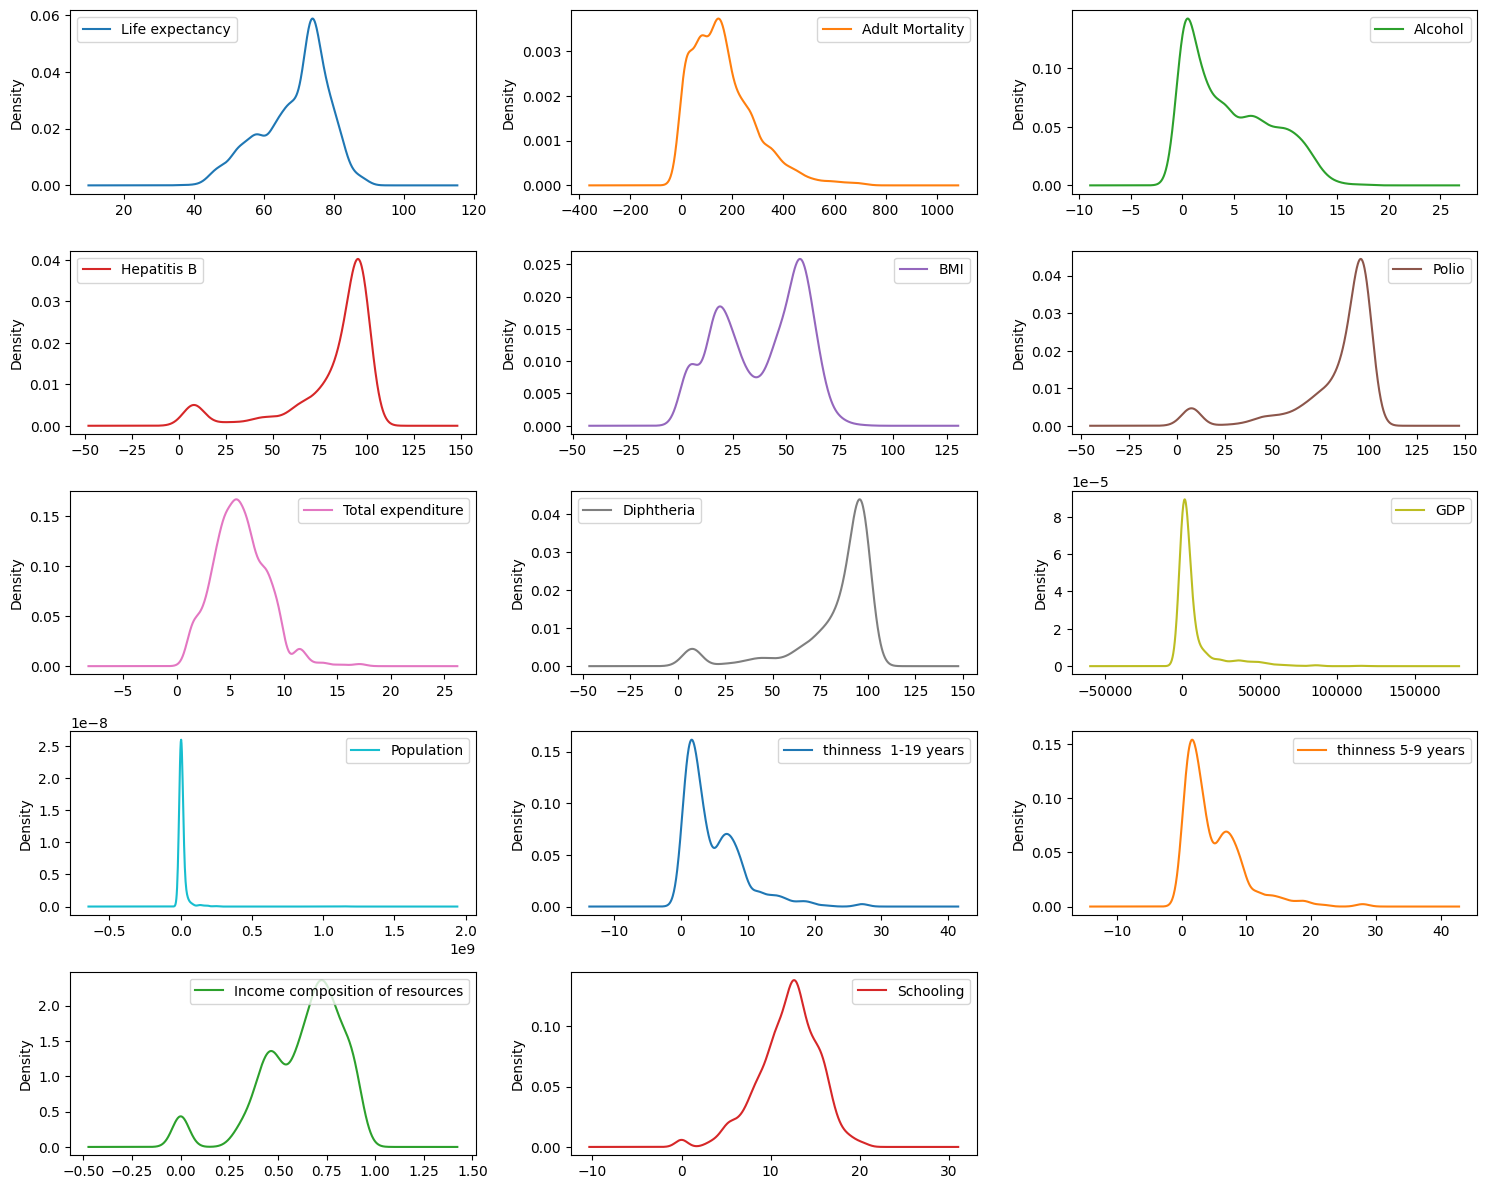

In [ ]:
# Ceating density plot for columns with missing values.
df[null_cols].plot(kind = 'density', subplots = True, layout = (5, 3), sharex = False, sharey = False, figsize = (15, 12))
plt.tight_layout()
plt.show()

**Observations:**

* Judging by the shape of distribution along the varaibles (skewed), replacing missing values with median values will be appropriate.

* Schooling howerver, has distribution close to normal will be replacing with mean values.

In [ ]:
# Function to replace missing values with median values
medianFiller = lambda x: x.fillna(x.median())

# Function to replace missing values with mean values
meanFiller = lambda x: x.fillna(x.mean())

# Setting the features that will be imputed with median values (excluding 'Schooling')
median_cols = [col for col in null_cols if col != 'Schooling']

# Apply median filler to selected columns
df[median_cols] = df[median_cols].apply(medianFiller)

# Apply mean filler to 'Schooling' column directly
df['Schooling'] = meanFiller(df['Schooling'])

# Check if any missing values remain
df[null_cols].isnull().any()

Life expectancy                    False
Adult Mortality                    False
Alcohol                            False
Hepatitis B                        False
BMI                                False
Polio                              False
Total expenditure                  False
Diphtheria                         False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

**Observations:**

* All the missing values are successfully imputed.
* Some of the column names need to be appropraitely formated.

In [ ]:
# Renaming the columns
df = df.rename(columns = {'Life expectancy': 'Life Expectancy', 'infant deaths': 'Infant Deaths', 'percentage expenditure': 'Percentage Expenditure',
                          'under-five deaths': 'Under Five Deaths', 'thinness  1-19 years': 'Thinness 1-19 Years', 'thinness 5-9 years': 'Thinness 5-9 Years',
                          'Income composition of resources': 'Income Composition of Resources', 'Total expenditure': 'Total Expenditure'})

In [ ]:
# Checking the conversion
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

* The column names are appropriately formatted.

In [ ]:
# Statistical summary of the data
df.describe()

Year  Life Expectancy  Adult Mortality  Infant Deaths    Alcohol  \
count 2938.00000       2938.00000       2938.00000     2938.00000 2938.00000   
mean  2007.51872         69.23472        164.72566       30.30395    4.54688   
std      4.61384          9.50912        124.08622      117.92650    3.92195   
min   2000.00000         36.30000          1.00000        0.00000    0.01000   
25%   2004.00000         63.20000         74.00000        0.00000    1.09250   
50%   2008.00000         72.10000        144.00000        3.00000    3.75500   
75%   2012.00000         75.60000        227.00000       22.00000    7.39000   
max   2015.00000         89.00000        723.00000     1800.00000   17.87000   

       Percentage Expenditure  Hepatitis B      Measles        BMI  \
count              2938.00000   2938.00000   2938.00000 2938.00000   
mean                738.25130     83.02212   2419.59224   38.38118   
std                1987.91486     22.99698  11467.27249   19.93537   
min                   0.00000      1.00000      0.00000    1.00000   
25%                   4.68534     82.00000      0.00000   19.40000   
50%                  64.91291     92.00000     17.00000   43.50000   
75%                 441.53414     96.00000    360.25000   56.10000   
max               19479.91161     99.00000 212183.00000   87.30000   

       Under Five Deaths      Polio  Total Expenditure  Diphtheria   HIV/AIDS  \
count         2938.00000 2938.00000         2938.00000  2938.00000 2938.00000   
mean            42.03574   82.61777            5.92410    82.39312    1.74210   
std            160.44555   23.36717            2.40077    23.65556    5.07778   
min              0.00000    3.00000            0.37000     2.00000    0.10000   
25%              0.00000   78.00000            4.37000    78.00000    0.10000   
50%              4.00000   93.00000            5.75500    93.00000    0.10000   
75%             28.00000   97.00000            7.33000    97.00000    0.80000   
max           2500.00000   99.00000           17.60000    99.00000   50.60000   

               GDP       Population  Thinness 1-19 Years  Thinness 5-9 Years  \
count   2938.00000       2938.00000           2938.00000          2938.00000   
mean    6611.52386   10230851.22820              4.82189             4.85214   
std    13296.60345   54022417.45547              4.39762             4.48585   
min        1.68135         34.00000              0.10000             0.10000   
25%      580.48700     418917.25000              1.60000             1.60000   
50%     1766.94760    1386542.00000              3.30000             3.30000   
75%     4779.40519    4584371.25000              7.10000             7.20000   
max   119172.74180 1293859294.00000             27.70000            28.60000   

       Income Composition of Resources  Schooling  
count                       2938.00000 2938.00000  
mean                           0.63036   11.99279  
std                            0.20514    3.26438  
min                            0.00000    0.00000  
25%                            0.50425   10.30000  
50%                            0.67700   12.10000  
75%                            0.77200   14.10000  
max                            0.94800   20.70000

**Observations:**
* The average life expectancy is 69.23 years, with a standard deviation of 9.51 years. The minimum life expectancy of 36.30 years indicate some regions have quite low life expectancy.

* The average adult mortality rate is 164.73 per 1,000 live births, highlighting the high mortality on populations. The high standard deviation of 124.09, aligns with the statistics of life expectancy. Both attributes imply the existence of regions with severe health challenges.

* The average GDP is approximately 6,611 dollars and standard deviation of 13,296 dollars suggest the financial discrepencies between regions. This aligns with the regions with the gap of life expectancy and adult mortality.

* Overall, the features vary widely in their scales and distributions, with some showing signs of skewness and extreme values, which reflect the diversity in global health and development conditions.

## Exploratory Data Analysis (EDA)

## Univariate Analysis

### Categorical Variables

**Country**

In [ ]:
print(df['Country'].nunique())
print('-' * 30)
print(df['Country'].value_counts().sort_values(ascending = False).head(10))

193
------------------------------
Country
Afghanistan            16
Albania                16
Algeria                16
Angola                 16
Antigua and Barbuda    16
Argentina              16
Armenia                16
Australia              16
Austria                16
Azerbaijan             16
Name: count, dtype: int64


**Observations:**
* There are 193 countries in this dataset.
* It seems there are mutiple countries that has 16 counts of values in the variable.

In [ ]:
country = df['Country'].value_counts()

countries_16 = []

for i in range(len(country)):
        if country[i] == 16:
            countries_16.append(country.index[i])

len(countries_16)

183

**Observations:**
* There are 183 countries that has 16 values in Country variable.
* This might lead to overfitting or make over-complex model, especially if there is limited data for each country.
* Therefore, country variable will be dropped.

**Status**

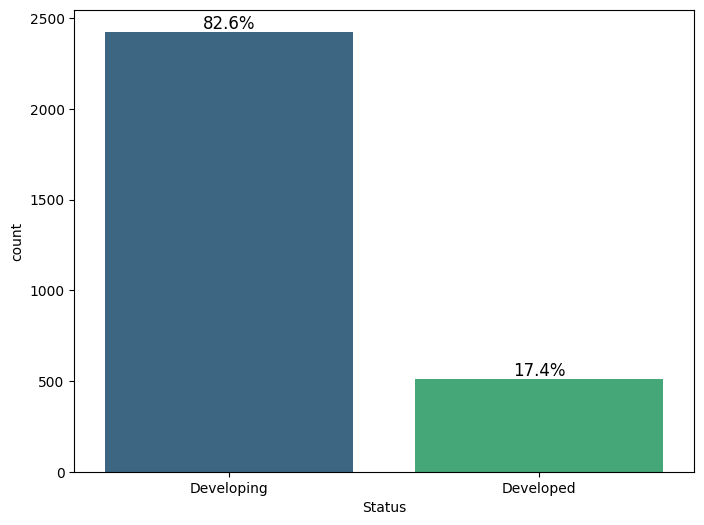

In [ ]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(data = df, x = 'Status', order = df['Status'].value_counts().index[:], palette = 'viridis')

total = len(df['Status'])

for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / total)
      x = p.get_x() + p.get_width()/2
      y = p.get_height()

      ax.annotate(label, (x, y), ha = 'center', va = 'center', xytext = (0, 6), size = 12,
                  textcoords = 'offset points')

plt.show()

**Observations:**

* The number of status for developing countries (82.6%) is approximately five times than that (17.4%) of developed countries.

* Let's check the number of countries in each class.

In [ ]:
# Subsetting the dataset where the status of the country is developing
developing = df[df['Status'] == 'Developing']
# Subsetting the dataset where the status of the country is developed
developed = df[df['Status'] == 'Developed']

# The number of developing and developed countries in the dataset
num_developing = developing.loc[:, 'Country'].nunique()
num_developed = developed.loc[:, 'Country'].nunique()

print(f'The number of developing countries is {num_developing}.')
print(f'The number of developed countries is {num_developed}.')

The number of developing countries is 161.
The number of developed countries is 32.


**Year**

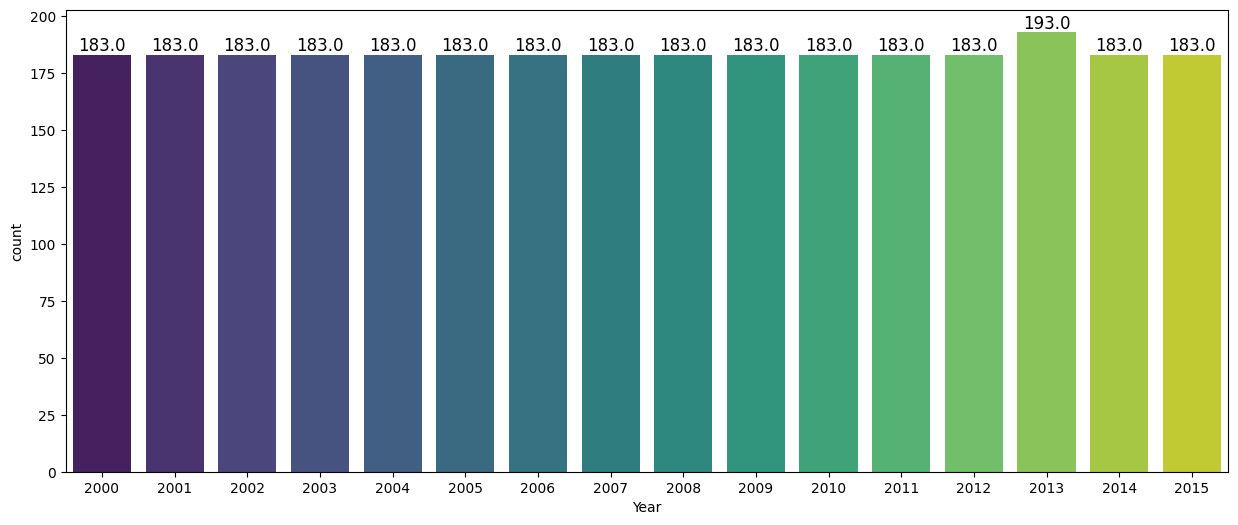

In [ ]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(data = df, x = 'Year', palette = 'viridis')
for p in ax.patches:
        label = p.get_height()
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x, y), ha = 'center', va = 'center', size = 12, xytext = (0, 6),
                    textcoords = 'offset points')

plt.show()

**Observations:**
* Although the data type of Year is integer, it has nature of categorical variable.
* Except for year 2013, all other years from 2000 to 2015 has the same number of values.
* The year does not need further analysis.

**Observations:**
* Two columns are successfully dropped.

### Numeric Variables

In [ ]:
# Function to display numeric features into boxplot and histogram
def hist_boxplot(data, var, figsize = (10, 8)):

      """
      Visualizes a histogram and boxplot for a given numeric variable.

      Parameters:
      - var: Column name of the numeric variable.
      - figsize: Size of the combined plot set to default = (10, 8).

      Output:
      - Combined boxplot and histogram.
      """

      # Create subplot with 2 rows: boxplot (25 percent) + histogram (75 percent)
      fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, figsize = figsize,
                                            gridspec_kw = {'height_ratios': (0.25, 0.75)})

      # Plotting boxplot
      sns.boxplot(data = data, x = var, ax = ax_box, showmeans = True)

      # Plotting histogram
      sns.histplot(data = data, x = var, ax = ax_hist, kde = True)
      ax_hist.axvline(data[var].median(), color = 'black', label = 'Median')
      ax_hist.axvline(data[var].mean(), color = 'red', label = 'Mean')

      plt.tight_layout()
      plt.legend()
      plt.show()

**Life Expectancy**

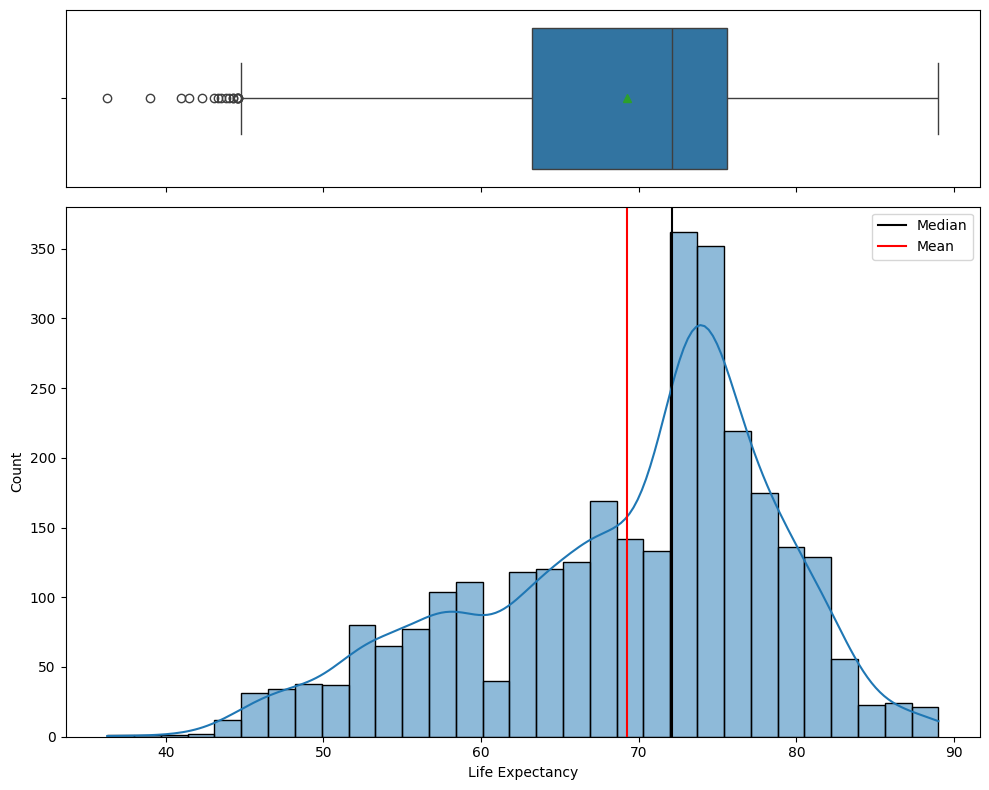

In [ ]:
# Histogram and Boxplot for Life expectancy
hist_boxplot(df, 'Life_Expectancy')

**Observations:**
* The plots show left-skewness on life expectancy and very small number of people have life expectancy under 45.



**Adult Mortality**

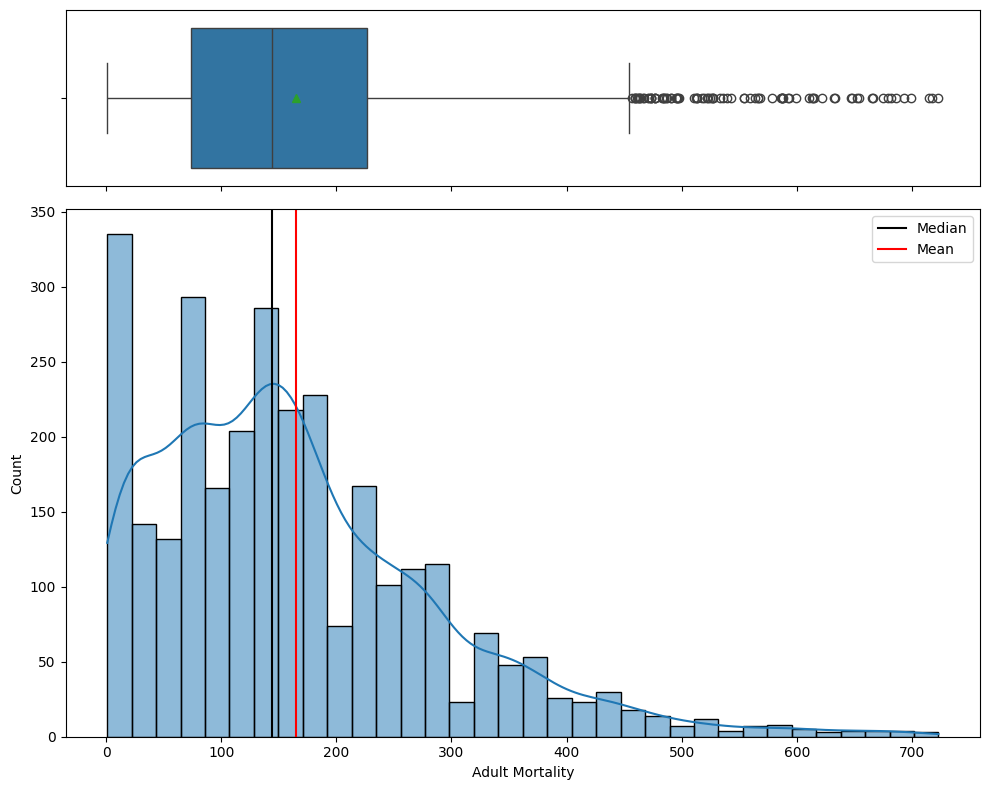

In [ ]:
# Histogram and Boxplot for Adult Mortality
hist_boxplot(df, 'Adult_Mortality')

**Observations:**
* The plots show right-skewness on adult mortality and numerous number of deaths over 450 per 1000 people.



**Infant Deaths**

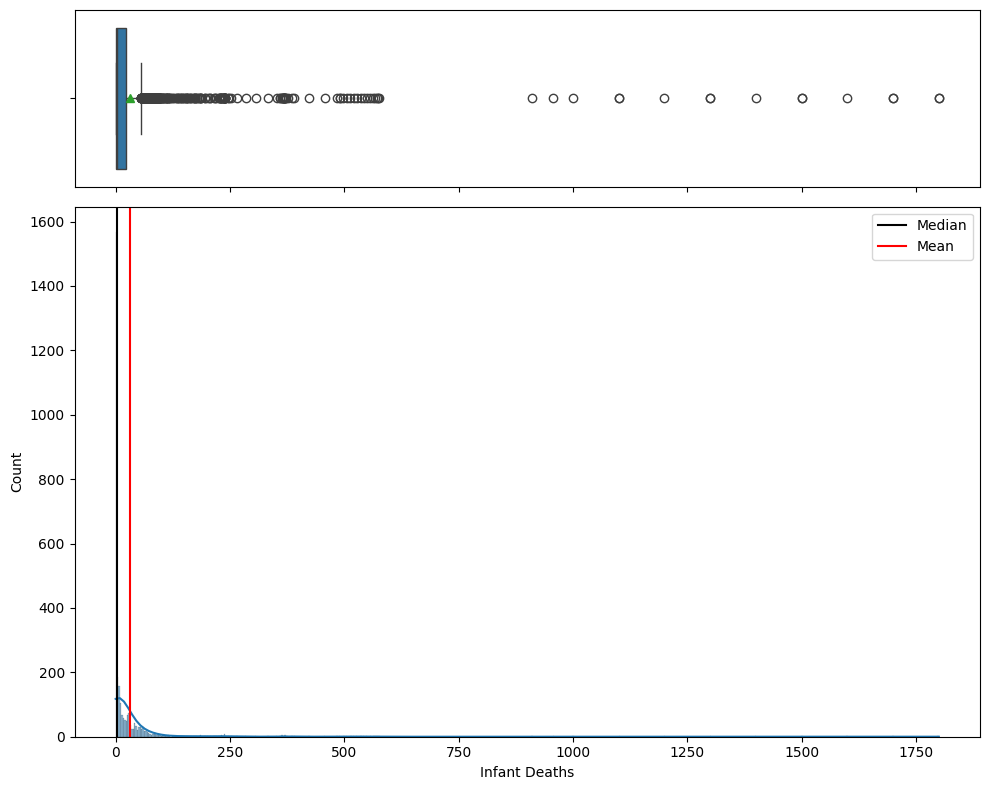

In [ ]:
# Histogram and Boxplot for Infant deaths
hist_boxplot(df, 'Infant_Deaths')

**Observations:**
* The plots show extreme right-skewness on infant deaths, showing numerous extreme outliers.

**Alchohol**

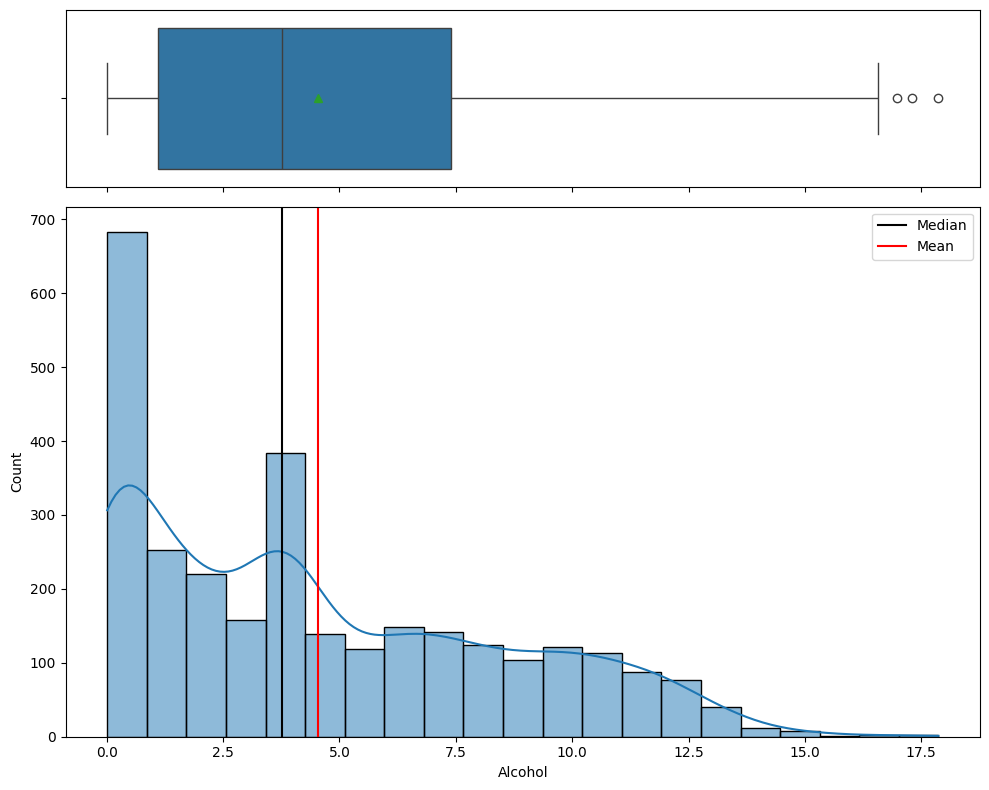

In [ ]:
# Histogram and Boxplot for Alcohol
hist_boxplot(df, 'Alcohol')

**Observations:**
* The plots show right-skewness on alcohol and very few number of outliers over approximately 16.0.

**Percentage Expenditure**

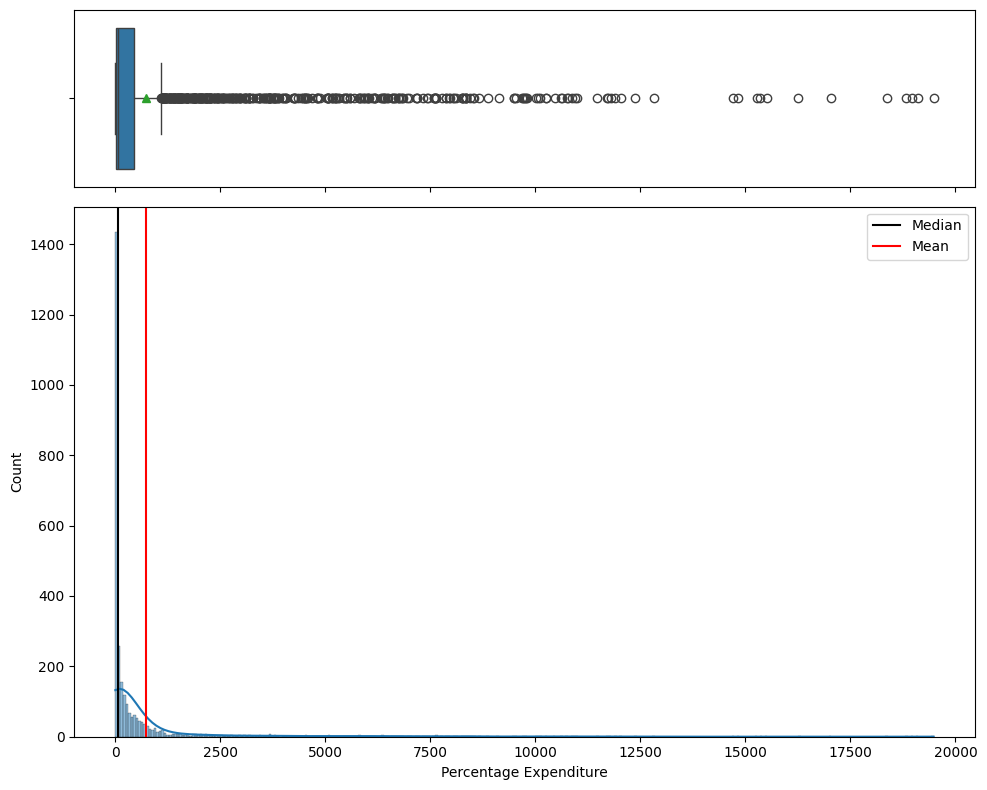

In [ ]:
# Histogram and Boxplot for Percentage expenditure
hist_boxplot(df, 'Percentage_Expenditure')

**Observations:**
* The plots show extreme right-skewness on percentage expenditure, showing numerous extreme outliers.

**Hepatitis B**

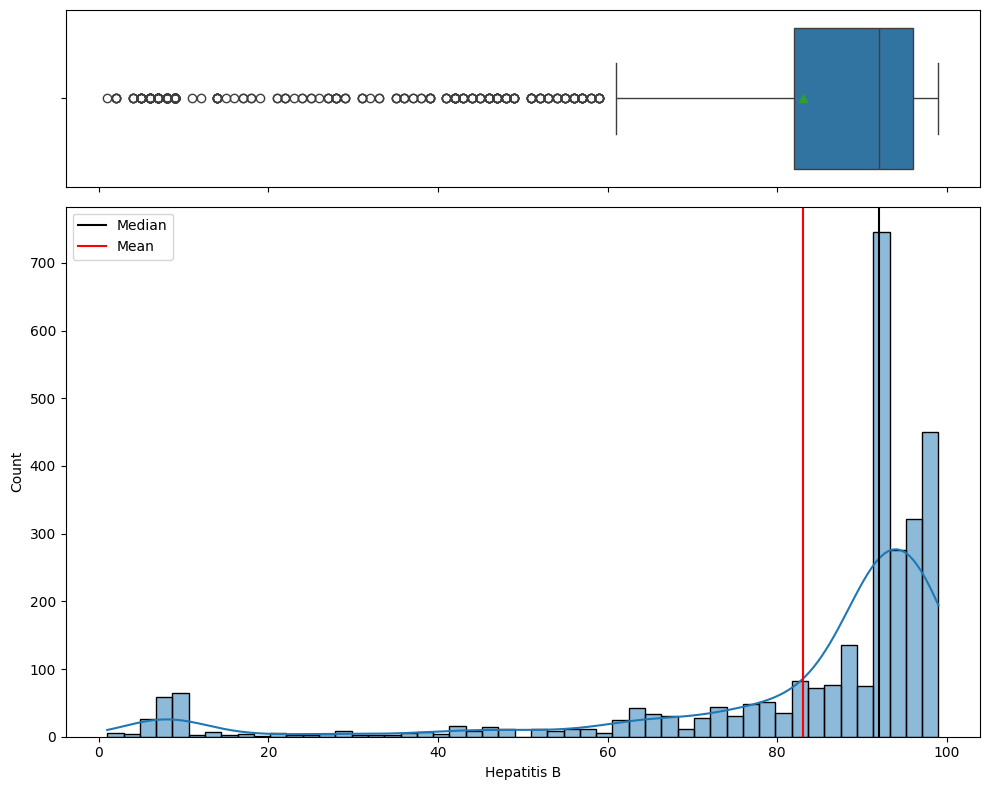

In [ ]:
# Histogram and Boxplot for Hepatitis B
hist_boxplot(df, 'Hepatitis_B')

**Observations:**
* The plots show left-skewness on hepatitis b and few number of outliers under approximately 60.

**Measles**

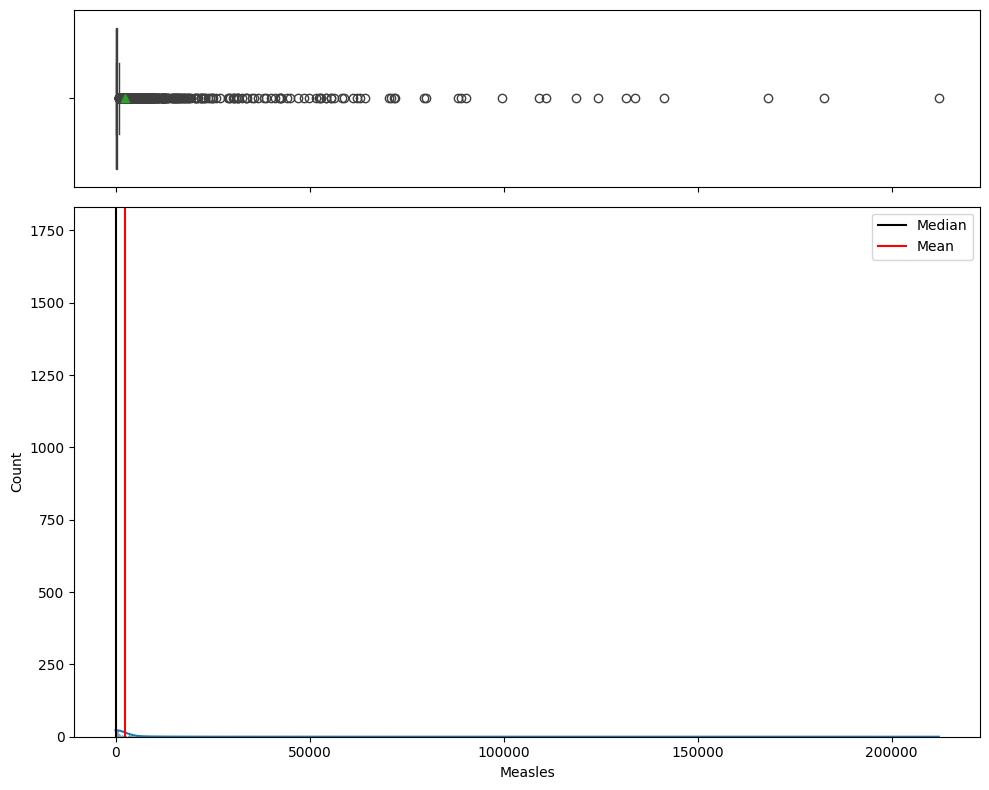

In [ ]:
# Histogram and Boxplot for Measles
hist_boxplot(df, 'Measles')

**Observations:**
* The plots show extreme right-skewness on percentage expenditure, showing numerous extreme outliers.

**BMI**

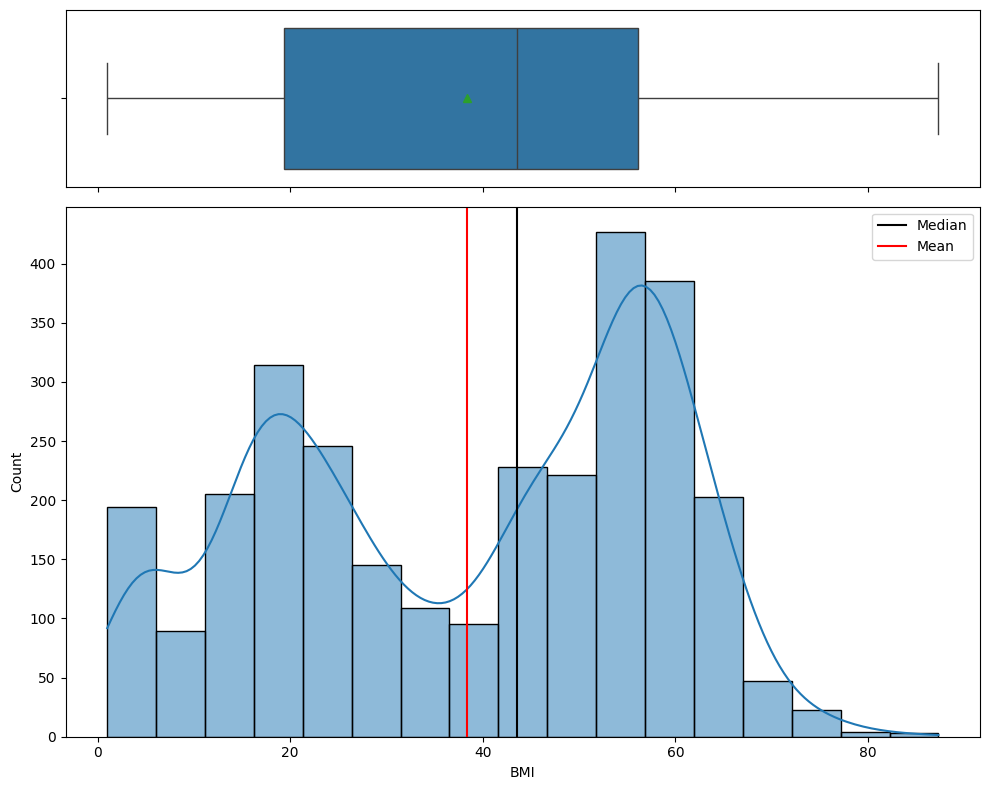

In [ ]:
# Histogram and Boxplot for BMI
hist_boxplot(df, 'BMI')

**Observations:**
* The plots show bimodal distribution with peaks around 20 and 40 on BMI.

**Under Five Deaths**

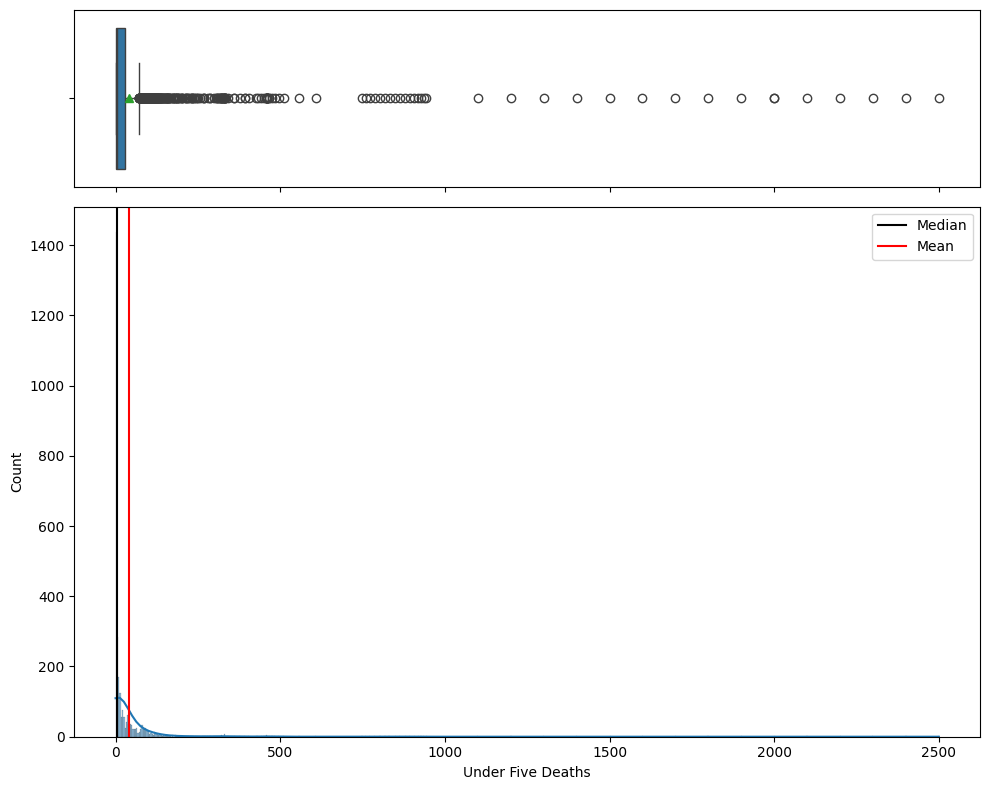

In [ ]:
# Histogram and Boxplot for Under-five deaths
hist_boxplot(df, 'Under Five Deaths')

**Observations:**
* The plots show extreme right-skewness on under five deaths, showing numerous extreme outliers.

**Polio**

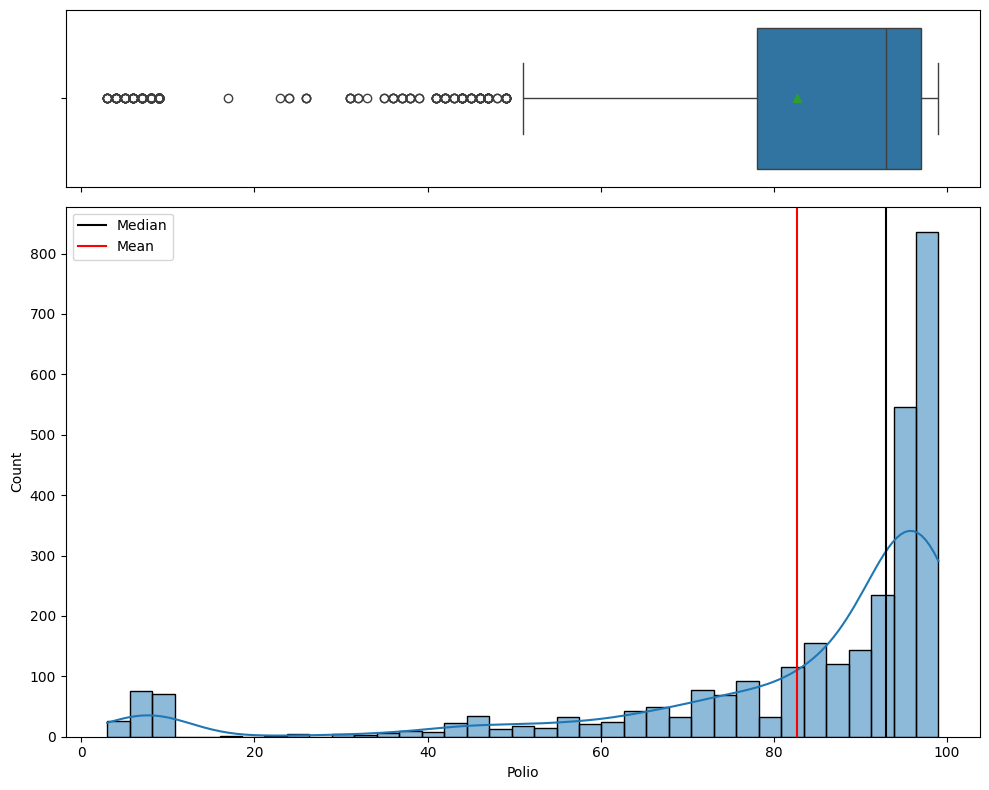

In [ ]:
# Histogram and Boxplot for Polio
hist_boxplot(df, 'Polio')

**Observations:**
* The plots show left-skewness on polio and few number of outliers under approximately 50.

**Total Expenditure**

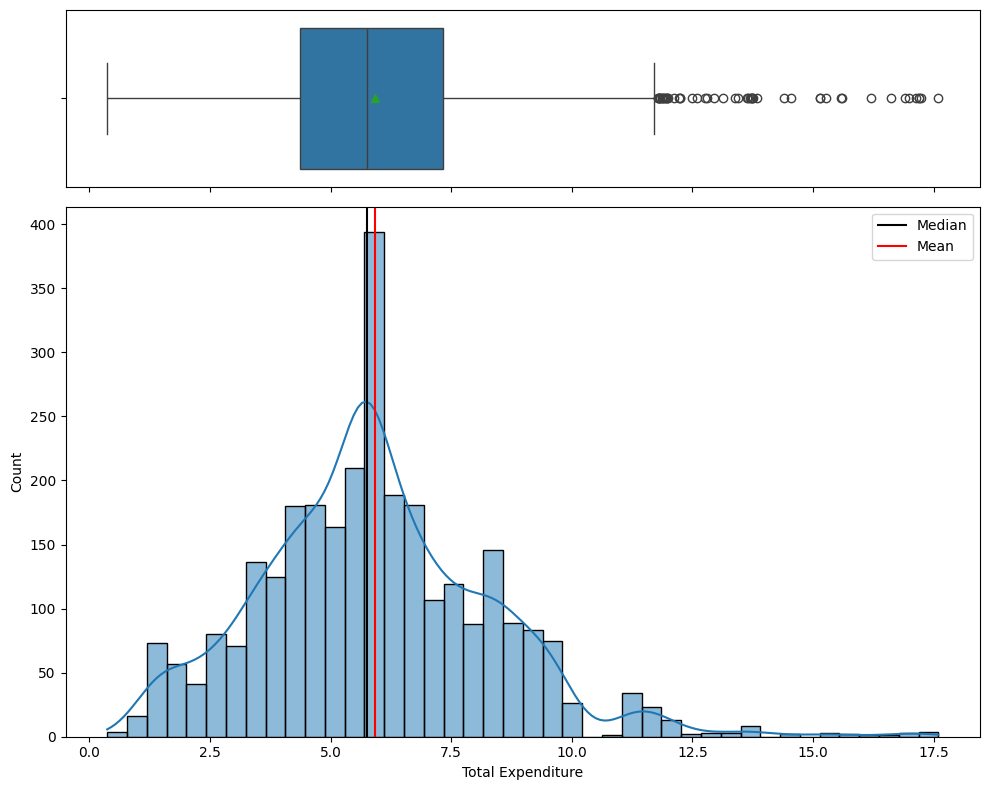

In [ ]:
# Histogram and Boxplot for Total expenditure
hist_boxplot(df, 'Total Expenditure')

**Observations:**
* The plots show right-skewness on total expenditure and few number of outliers over approximately 11.0.

**Diphtheria**

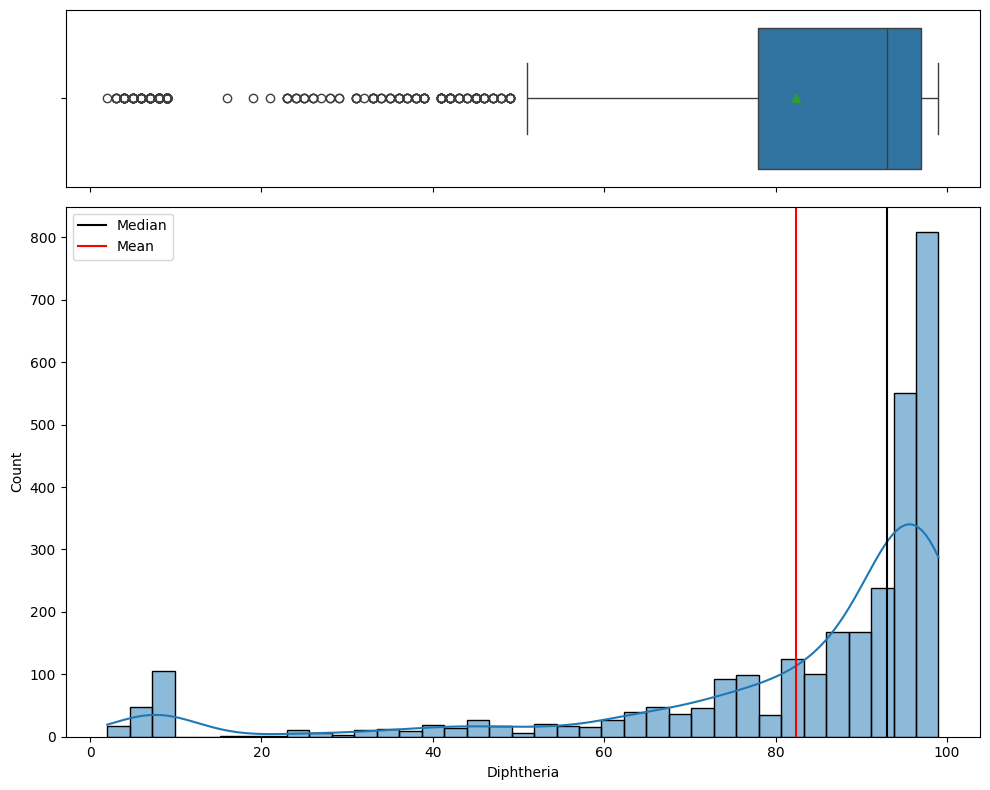

In [ ]:
# Histogram and Boxplot for Diphtheria
hist_boxplot(df, 'Diphtheria')

**Observations:**
* The plots show left-skewness on diphtheria and few number of outliers under approximately 50.

**HIV/AIDS**

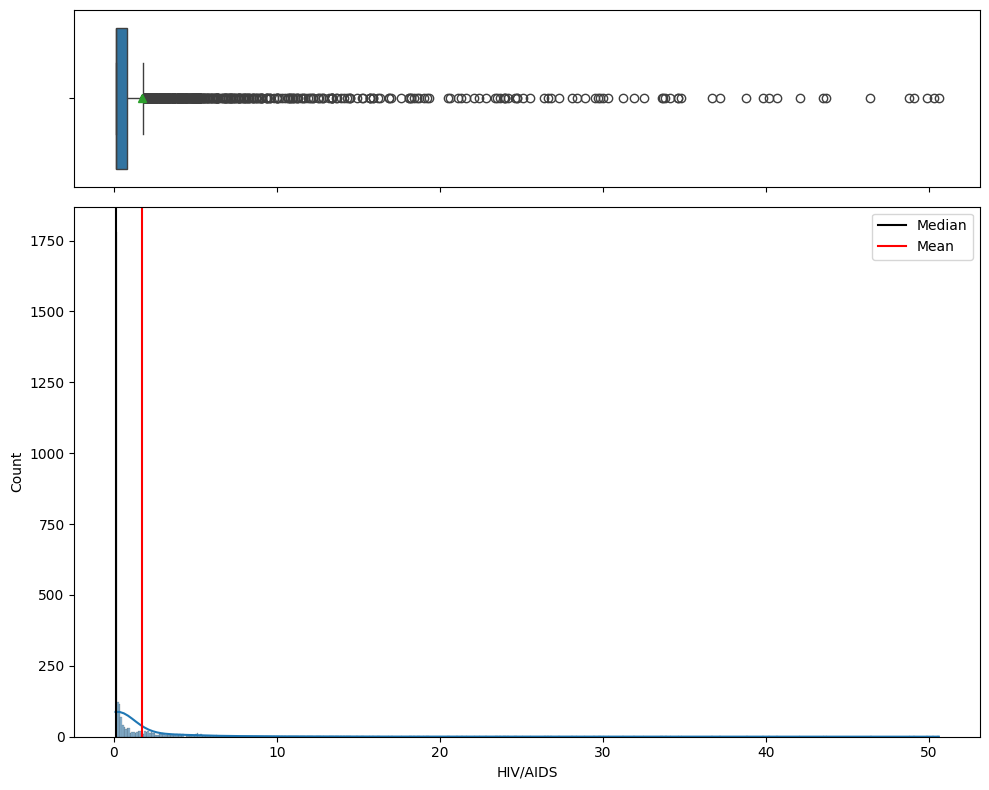

In [ ]:
# Histogram and Boxplot for HIV/AIDS
hist_boxplot(df, 'HIV/AIDS')

**Observations:**
* The plots show extreme right-skewness on hiv/aids, showing numerous extreme outliers.

**GDP**

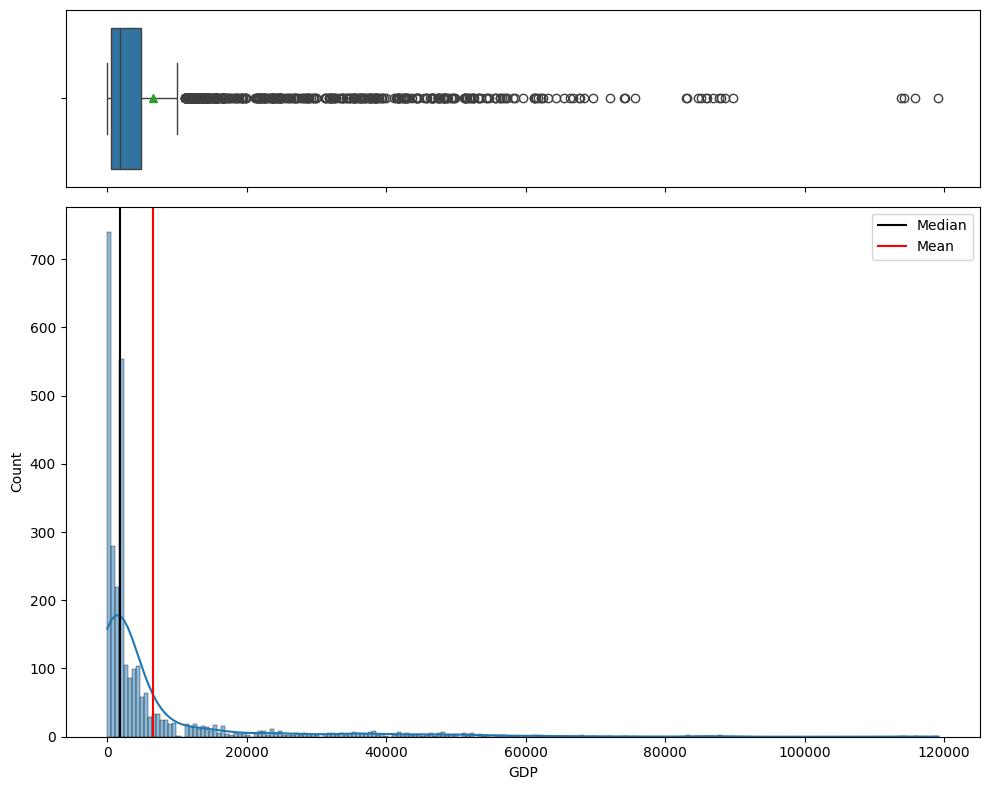

In [ ]:
# Histogram and Boxplot for GDP
hist_boxplot(df, 'GDP')

**Observations:**
* The plots show extreme right-skewness on GDP, showing numerous extreme outliers.

**Population**

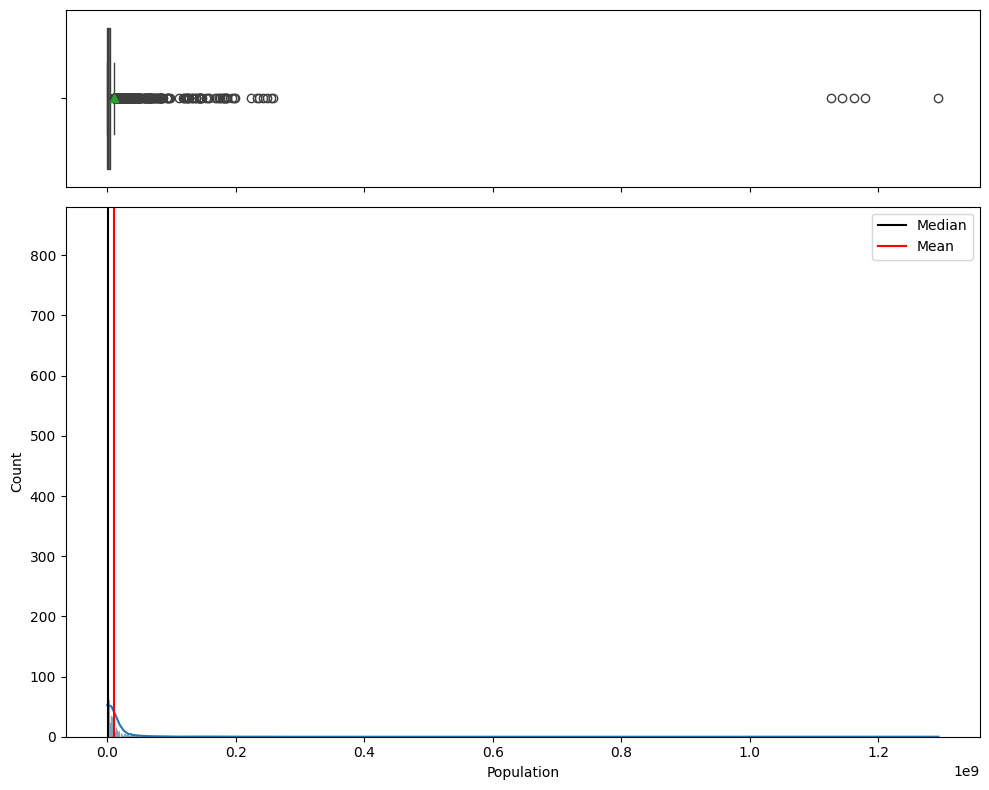

In [ ]:
# Histogram and Boxplot for Population
hist_boxplot(df, 'Population')

**Observations:**
* The plots show extreme right-skewness on under population, showing numerous extreme outliers.

**Thiness 1-19 Years**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  Under Five Deaths                2938 non-null   int64  
 12  Polio               

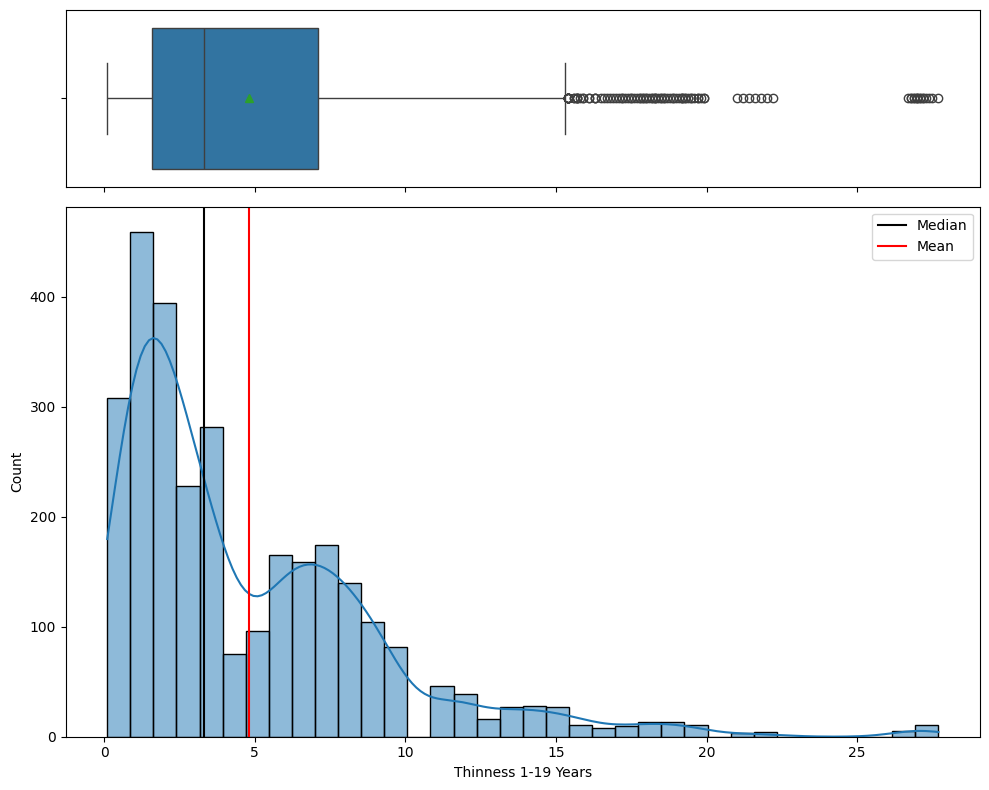

In [ ]:
# Histogram and Boxplot for Thinness 1-19 years
hist_boxplot(df, 'Thinness 1-19 Years')

**Observations:**
* The plots show right-skewness on thiness 1-19 years and numerous number of outliers over approximately 15.

**Thiness 5-9 Years**

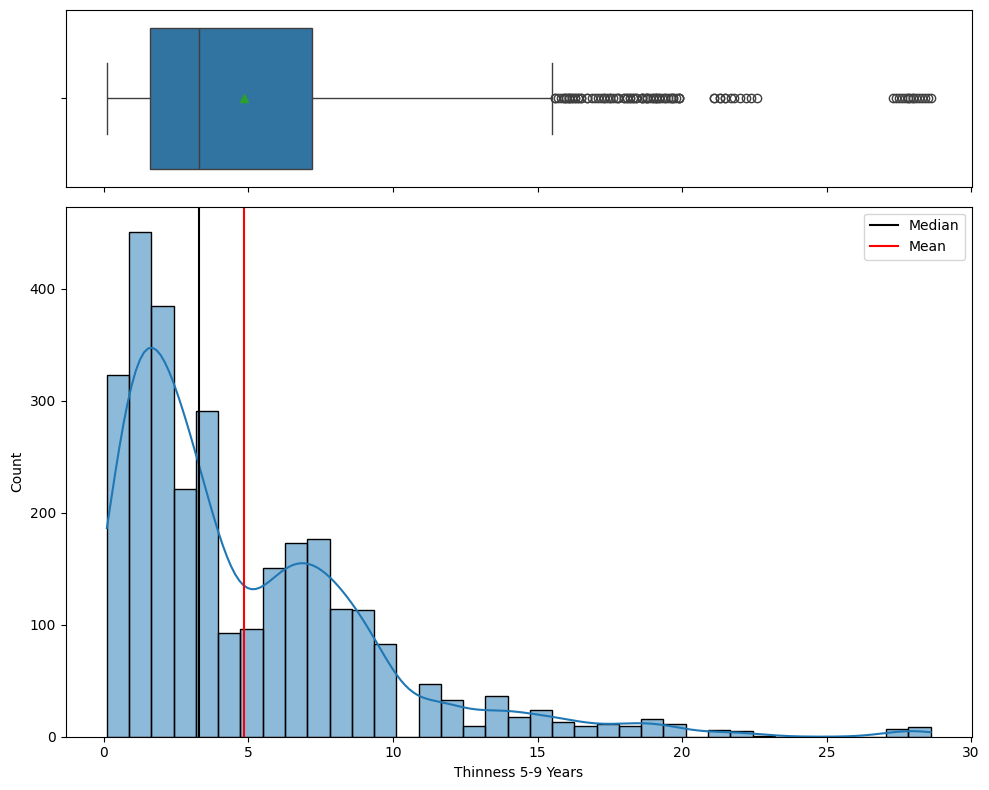

In [ ]:
# Histogram and Boxplot for Thinness 5-9 years
hist_boxplot(df, 'Thinness 5-9 Years')

**Observations:**
* The plots show right-skewness on thiness 5-9 years and numerous number of outliers over approximately 15.

**Income Composition of Resources**

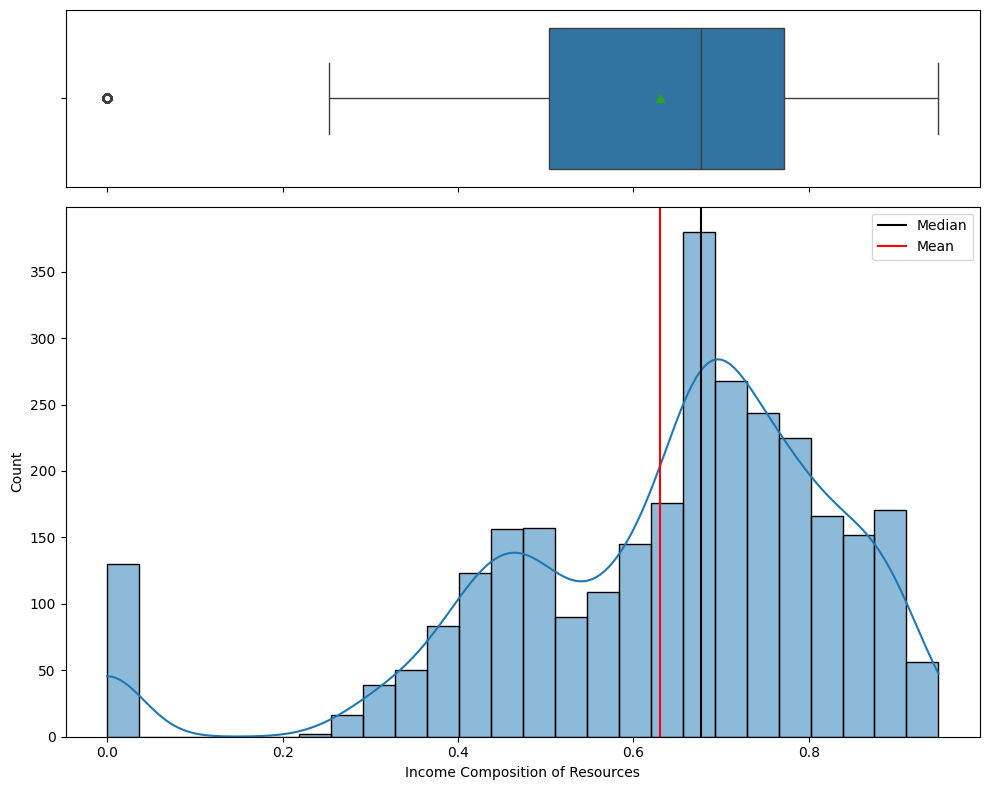

In [ ]:
# Histogram and Boxplot for Income composition of resources
hist_boxplot(df, 'Income Composition of Resources')

**Observations:**
* The plots show left-skewness on income composition of resources and very few number of outliers under approximately 0.2.

**Schooling**

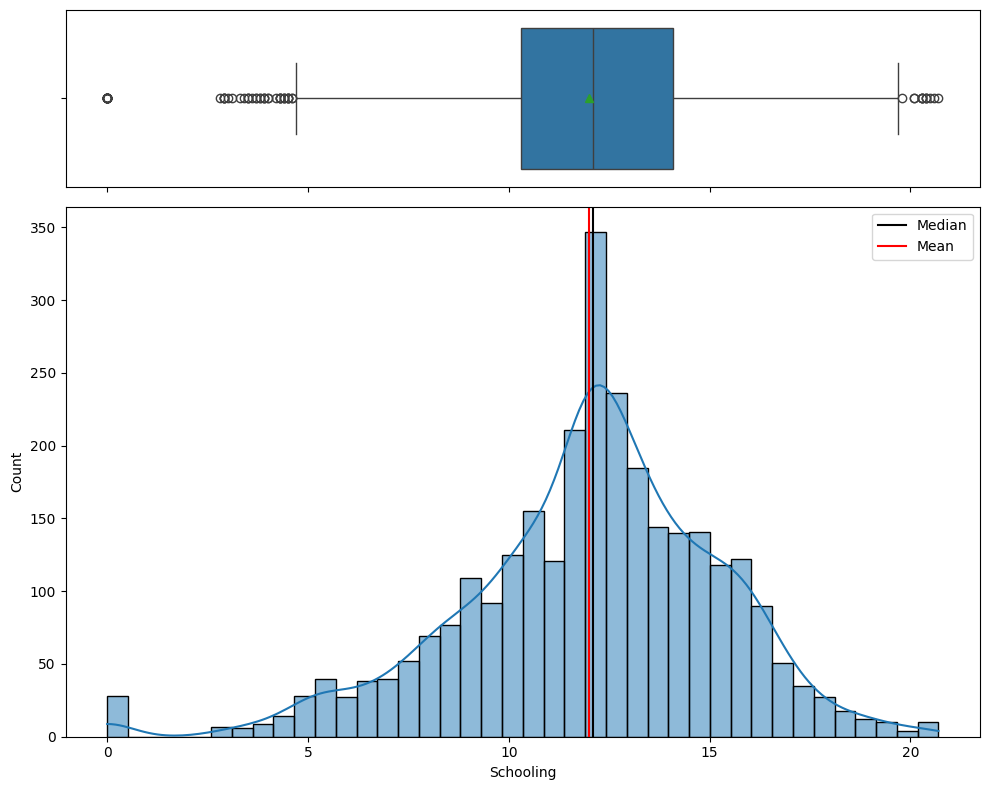

In [ ]:
# Histogram and Boxplot for Schooling
hist_boxplot(df, 'Schooling')

**Observations:**
* The plots show distribution close to normal and few number of outliers under 5 and sligtly under 20.

## Bivariate Analysis

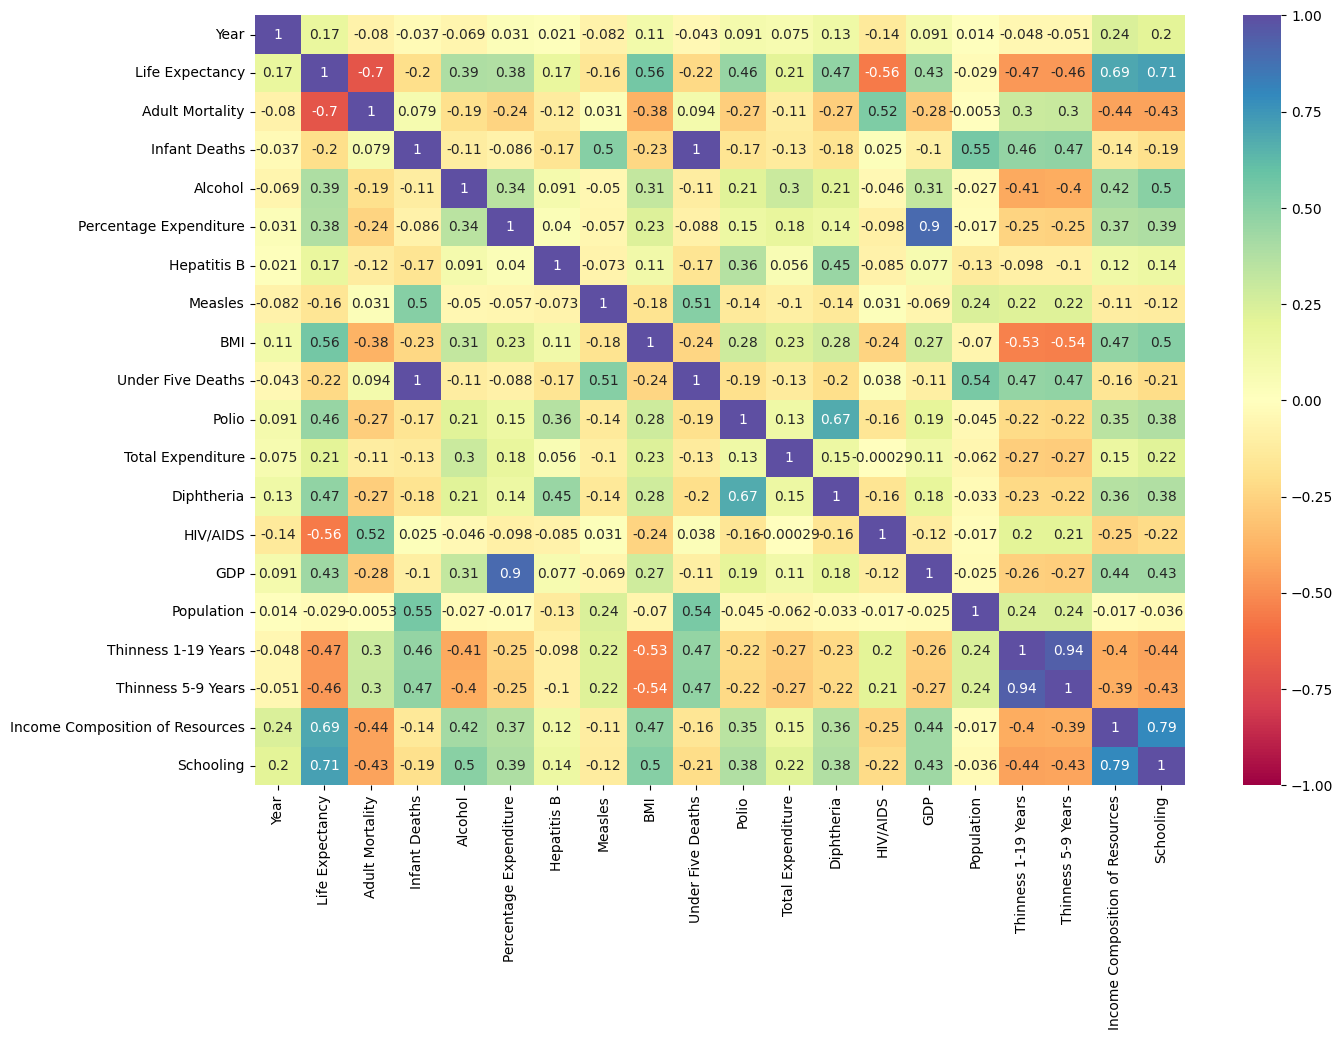

In [ ]:
# Listing the numerical varaibles
num_cols = df.select_dtypes(include = np.number).columns.tolist()

# Correlation check
plt.figure(figsize = (15, 10))
sns.heatmap(df[num_cols].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Spectral')
plt.show()

**Observations:**
* Adult Mortality, HIV/AIDS Prevalence, and Thinness in Youth: These factors show a strong negative correlation with life expectancy, indicating that as rates of adult mortality, HIV/AIDS, and thinness among young people increase, life expectancy tends to decrease. This trend is often seen in low-income countries where limited access to healthcare, nutrition, and preventive measures contributes to higher mortality rates and lower overall health.

* BMI, Income Composition of Resources, and Schooling: The positive association between these factors and life expectancy suggests that in high-income countries, people have better access to nutritious food, robust income structures, and education levels, contributing to overall well-being and longer life spans.

**Life Expectancy & Year**

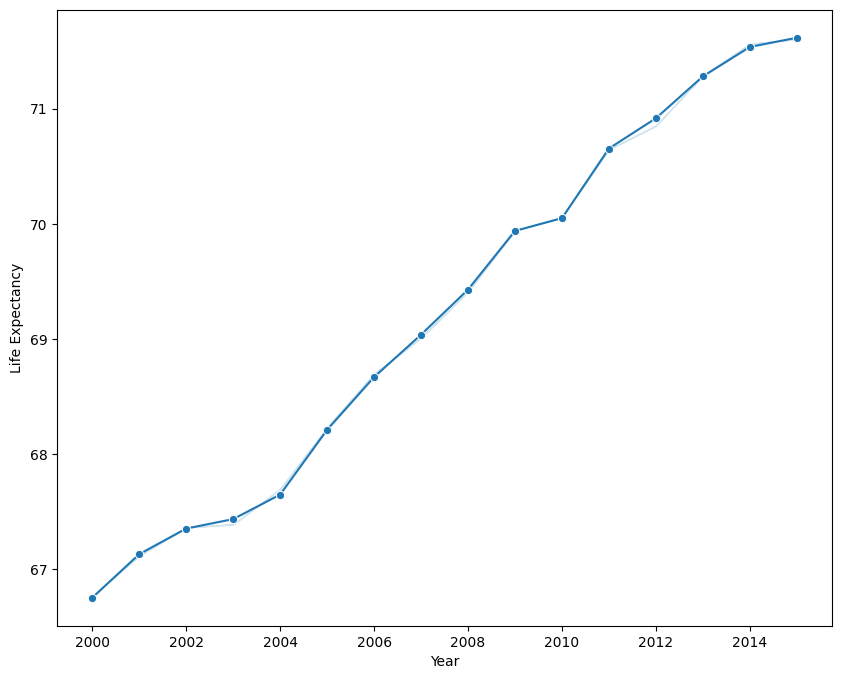

In [ ]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df, x = 'Year', y = 'Life Expectancy', ci = False, marker = 'o')
plt.show()

* The lineplot shows steady improvement in life expectancy, indicating reductions in mortality.
* This may be due to enhanced standard of living and quality of care.

**Life Expectancy & Status**

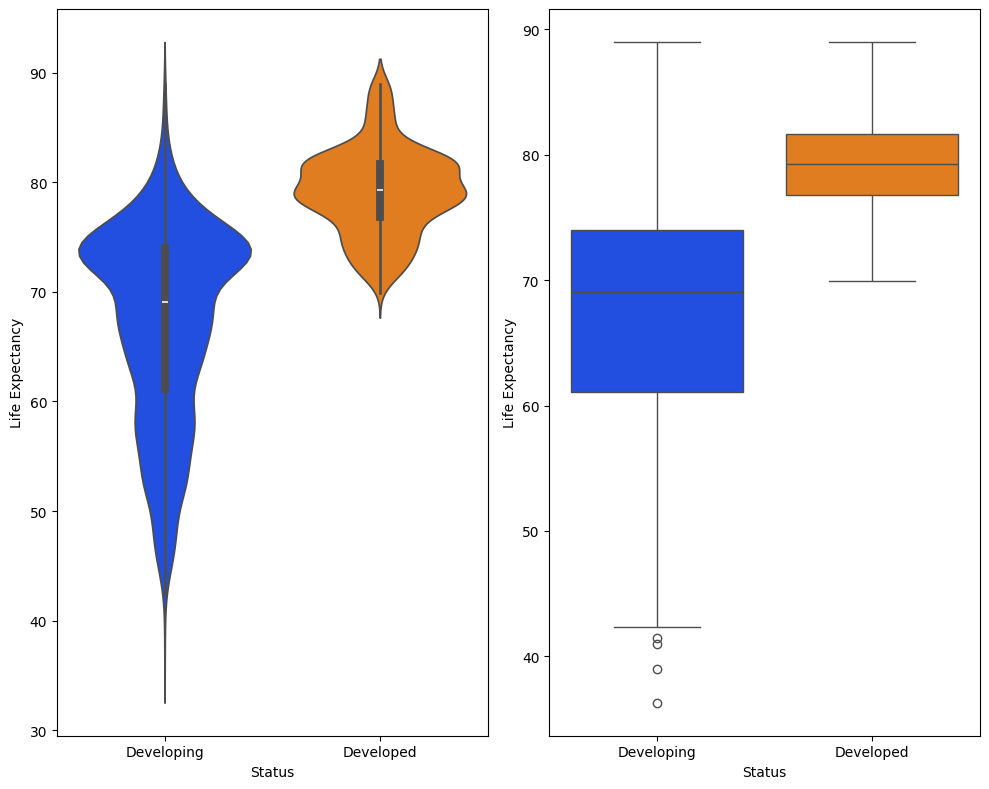

In [ ]:
plt.figure(figsize = (10, 8))
plt.subplot(121)
sns.violinplot(data = df, x = 'Status', y = 'Life Expectancy', palette = 'bright')

plt.subplot(122)
sns.boxplot(data = df, x = 'Status', y = 'Life Expectancy', palette = 'bright')
plt.tight_layout()
plt.show()

* The life expectancy of developing countries varies from under 40 to approximately 90 years.
* The life expectancy of developed countries ranges from approximately 70 to nearly 90, showing significantly higher life expectancy.
* This suggests that developed countries have better medical service in general that affects life expectancy compared to developing countries.

**Life Expectancy & Adult Mortality**

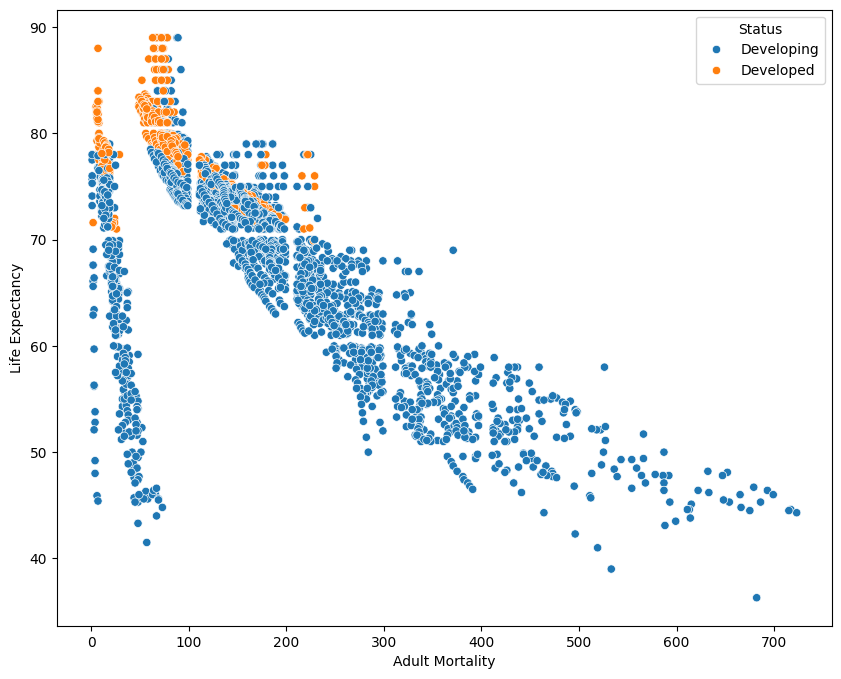

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Adult Mortality', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Life expectancy decrease as the probability of dying between 15 and 60 years of people per 1000 population.

* Individuals in the developed country have higher life expectancy than those in developing countries

**Life Expectancy & Infant Deaths**

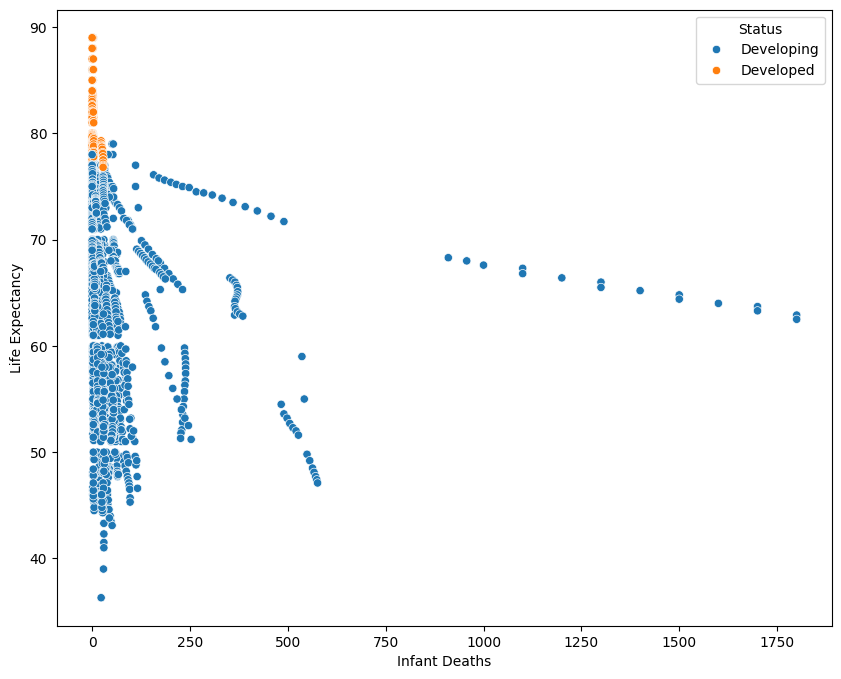

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Infant Deaths', y = 'Life Expectancy', hue = 'Status')
plt.show()

* There is a negative correlation between Infant Deaths and Life Expectancy.

* Some have very high infant mortality rates (up to 1800).

**Life Expectancy & Alchohol**

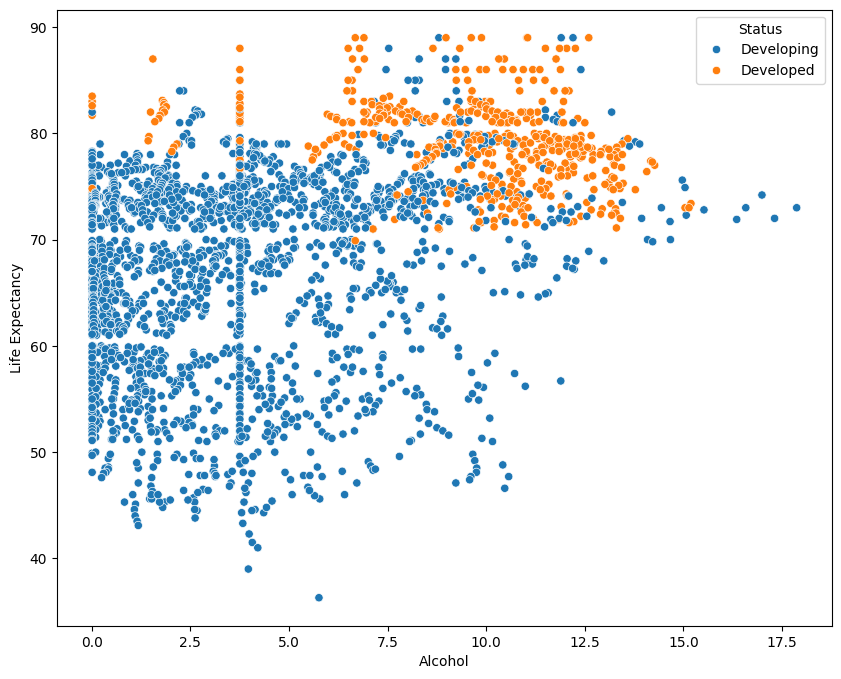

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Alcohol', y = 'Life Expectancy', hue = 'Status')
plt.show()

* It seems like there is a weak correlation between alchohol and life expectancy.

* While developed countries consume alchohol more after 10 liters, they have generally higher life expectancy, indicating potentially better medical system or better alcohol quality.

**Life Expectancy & Percentage Expenditure**

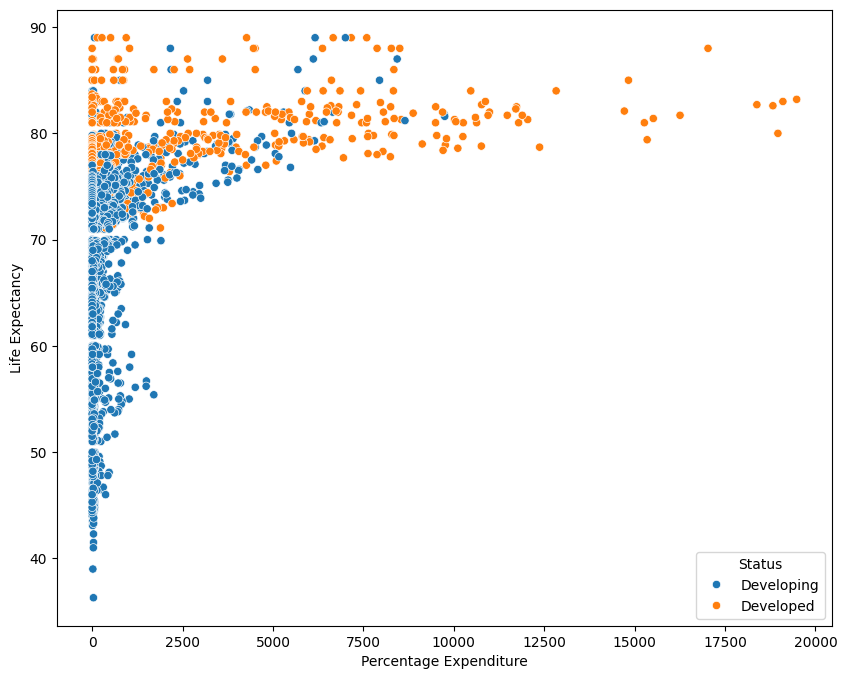

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Percentage Expenditure', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Develop countries tend to use more money out of total GDP than developing countries, specifically after 10,000.

**Life Expectancy & Hepatitis B**

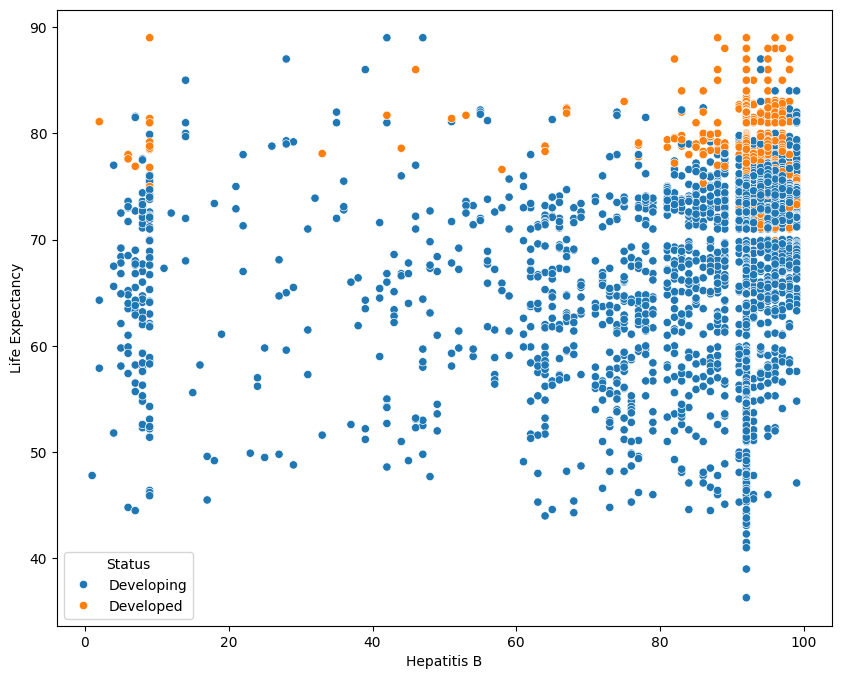

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Hepatitis B', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Most countries have high Hepatitis B vaccination rates (clustered around 80–100%), but developed countries have higher life expectancy in general.

**Life Expectancy & Measles**

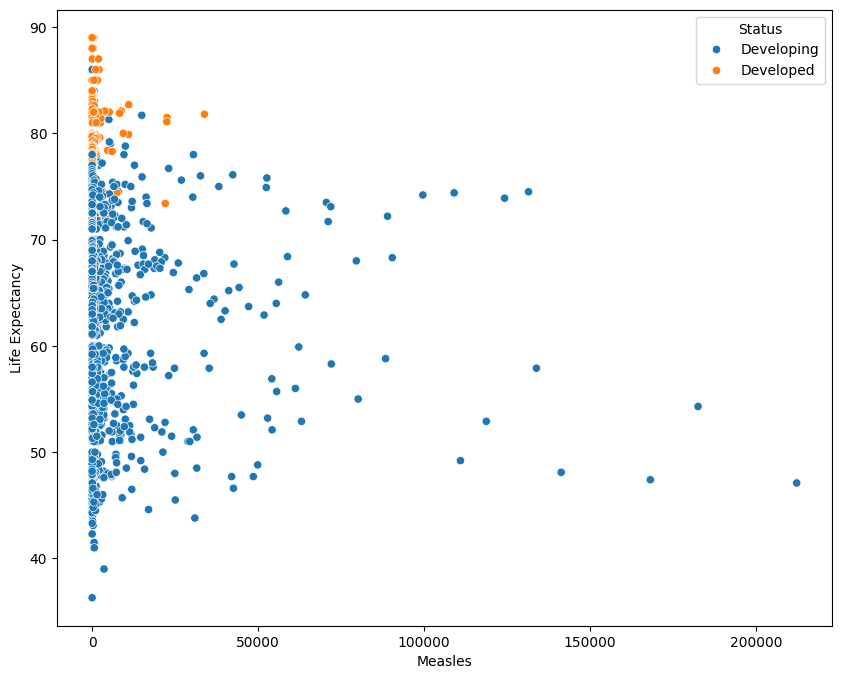

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Measles', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Developed countries have consistently low measles counts and high life expectancy, reflecting potentially effective immunization system.

* Some developing countries have very high meales counts.

**Life Expectancy & BMI**

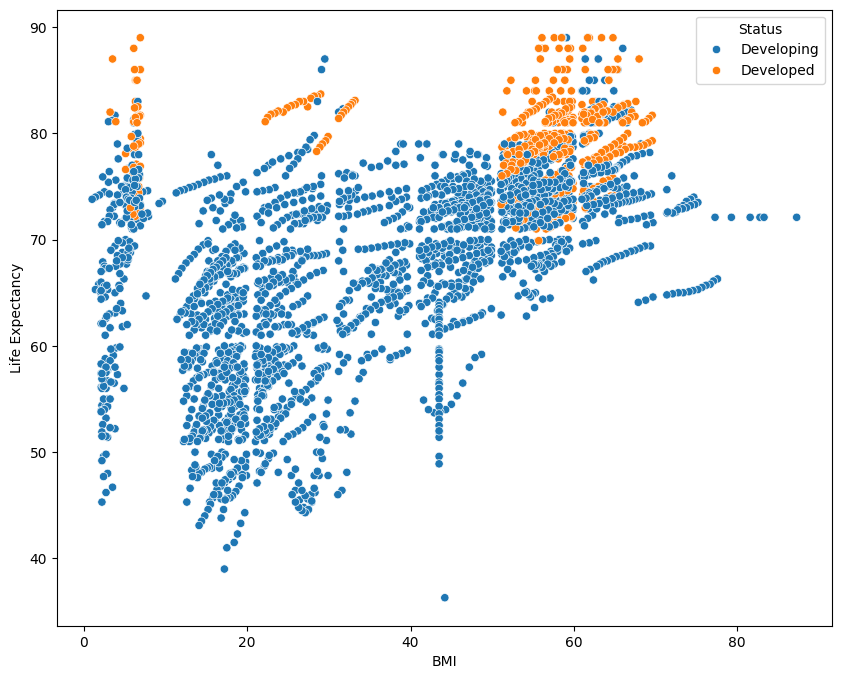

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'BMI', y = 'Life Expectancy', hue = 'Status')
plt.show()

* The relationship does not seem to be linear but clustered, especially developed countries.

* Developed countries are focused after near 50 BMI, but still have higher life expectancy in general.

**Life Expectancy & Under Five Deaths**

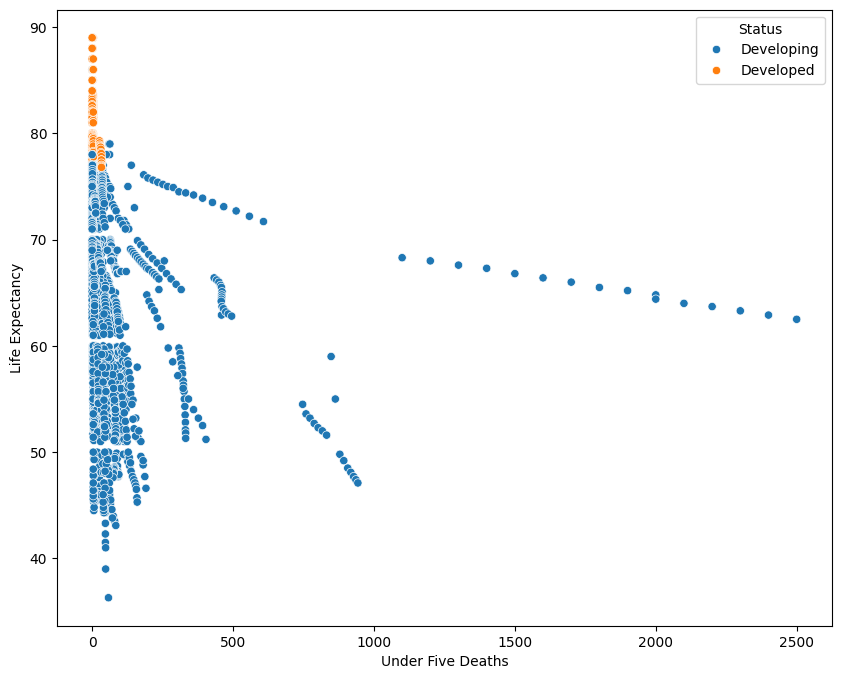

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Under Five Deaths', y = 'Life Expectancy', hue = 'Status')
plt.show()

* As under-five deaths increase, life expectancy clearly drops.

* Developed countries have very low count of death under five with higher life expectancy.

**Life Expectancy & Polio**

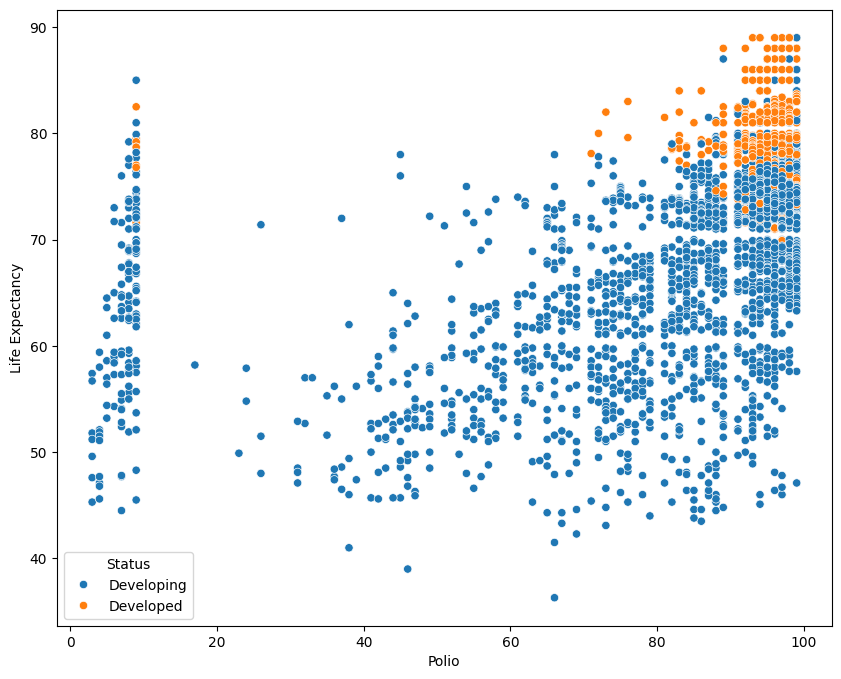

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Polio', y = 'Life Expectancy', hue = 'Status')
plt.show()

* As polio vaccination rates increase, life expectancy tends to rise.

* Developed countries cluster tightly after 80 vaccination with higher life expectancy.

**Life Expectancy & Total Expenditure**

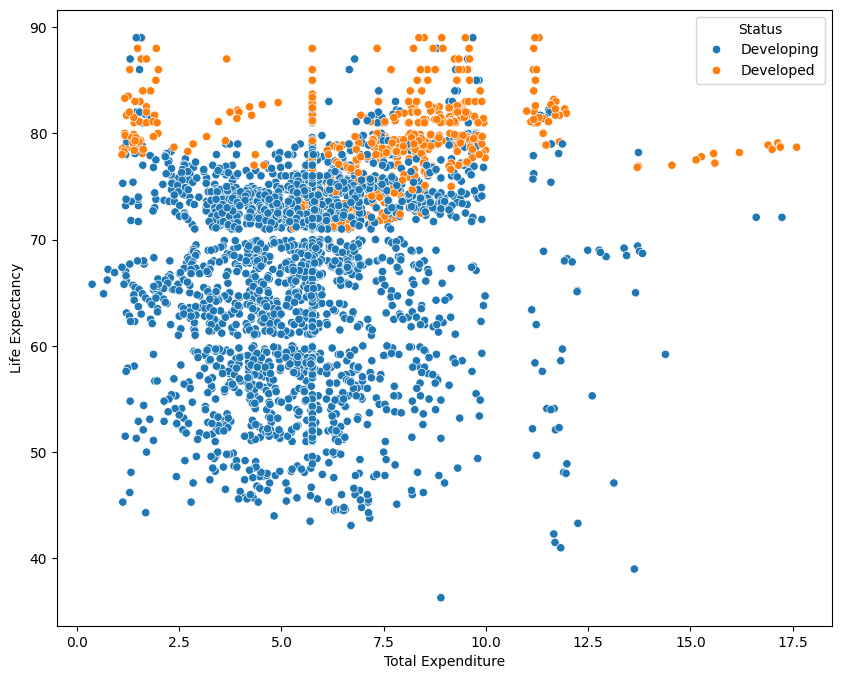

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Total Expenditure', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Developed countries tend to spend more (above 6–7) and achieve consistently high life expectancy.

* Developing countries spend less (below 6) with greater variance in life expectancy.

**Life Expectancy & Diphtheria**

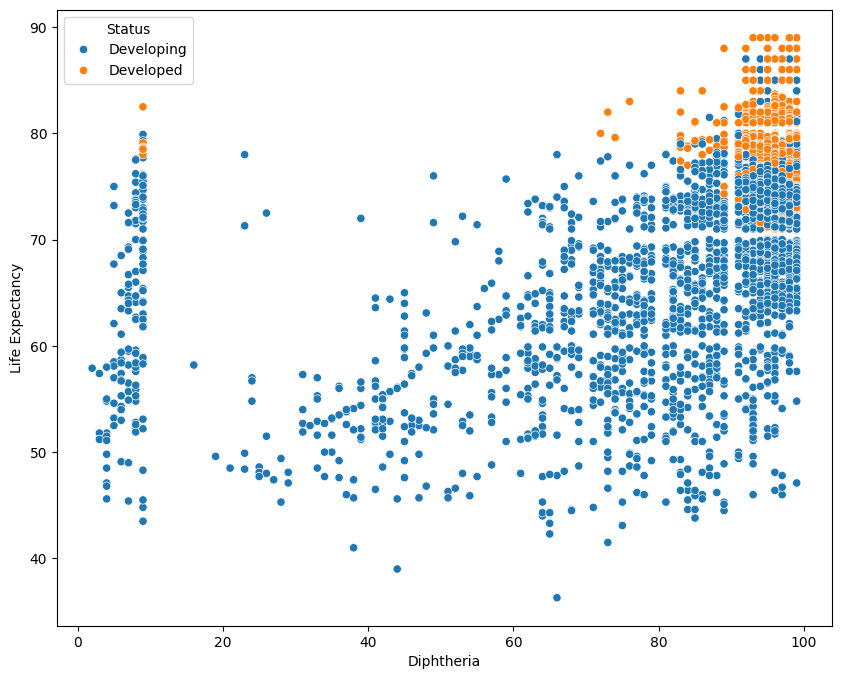

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Diphtheria', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Higher diphtheria vaccination rates generally align with higher life expectancy.

* Developed countries are clustered tightly near 80 vaccination with higher life expectancy.

**Life Expectancy & GDP**

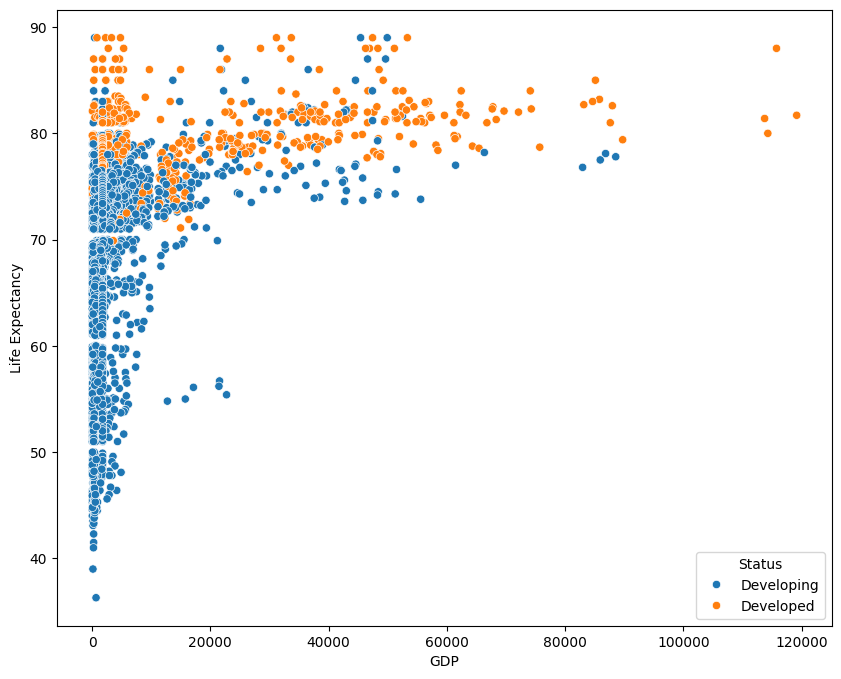

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'GDP', y = 'Life Expectancy', hue = 'Status')
plt.show()

At low level GDP, small increases are tend to lead to substantial gains in life expectancy, while showing diminishing pattern in high levels.

**Life Expectancy & Population**

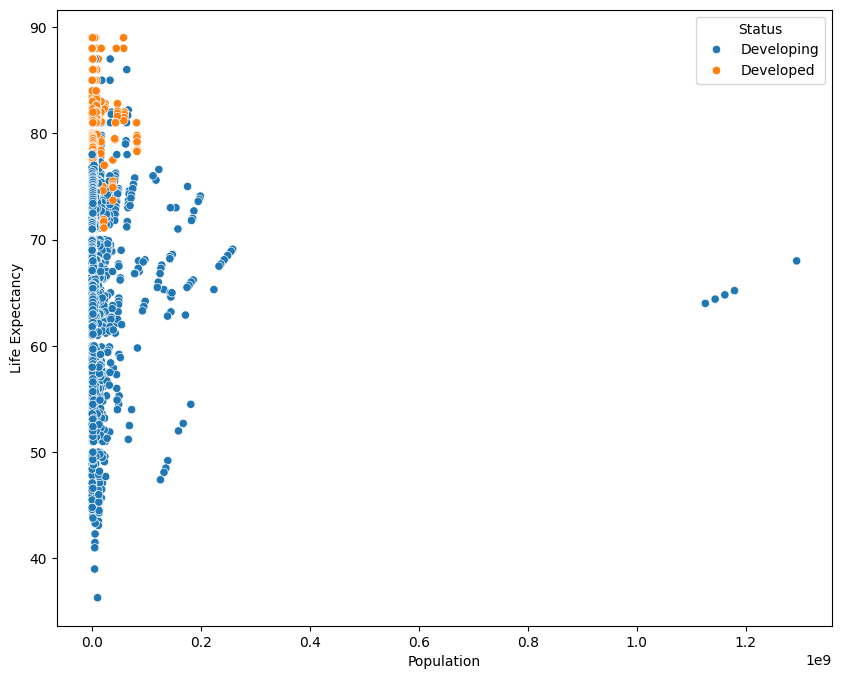

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Population', y = 'Life Expectancy', hue = 'Status')
plt.show()

* There seems to be no clear relationship between population size and life expectancy.

* Some countries have extremely high populations with life expectancy of 60-70.

**Life Expectancy & Thinness 1-19 Years**

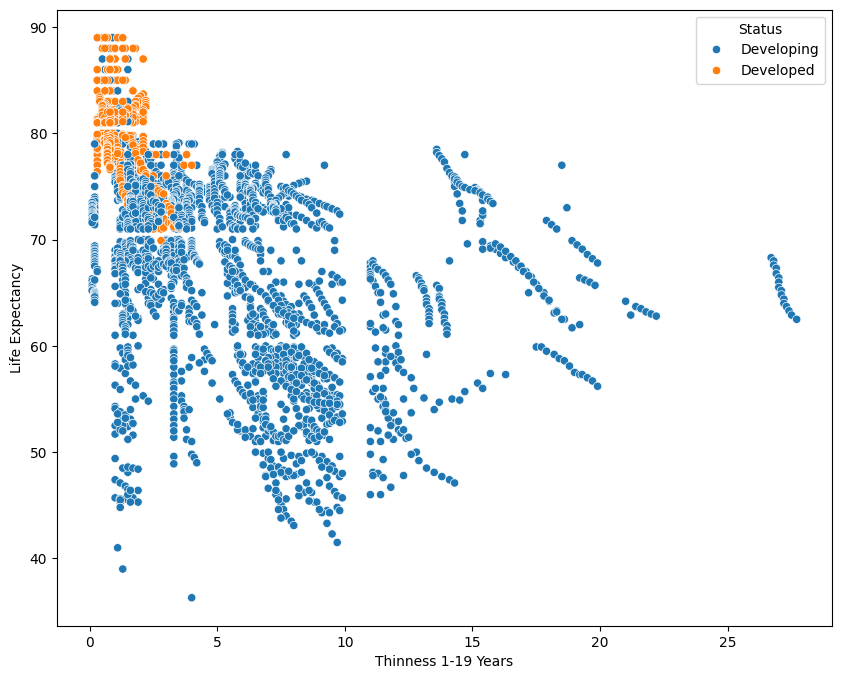

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Thinness 1-19 Years', y = 'Life Expectancy', hue = 'Status')
plt.show()

* As the percentage of thin individuals increases, life expectancy generally decreases.

* Developed countries cluster near low thinness values with high life expectancy, indicating healthy youth population.

**Life Expectancy & Thinness 5-9 Years**

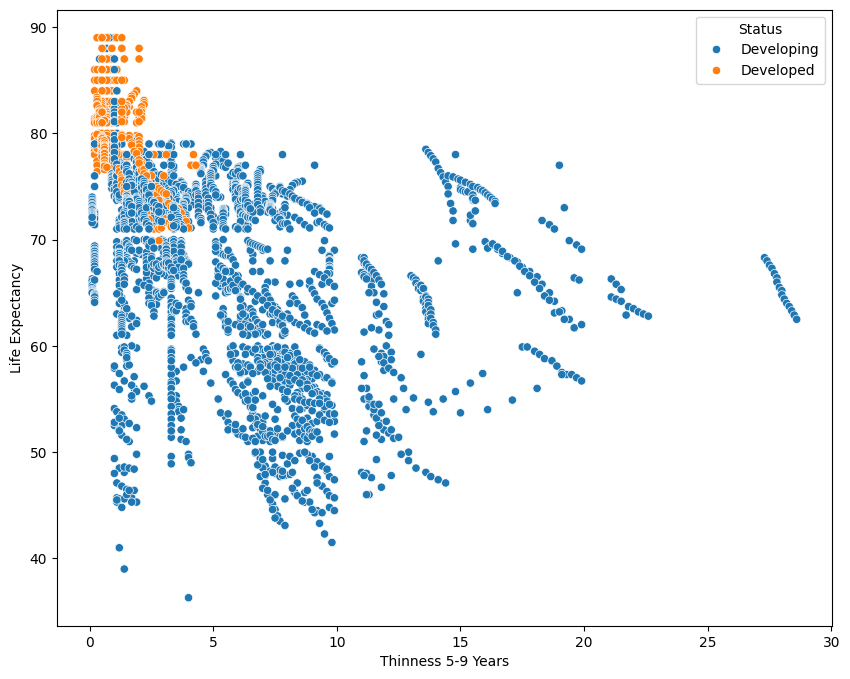

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Thinness 5-9 Years', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Shows similar distribution with thiness 1-19 years.

**Lifr Expectancy & Schooling**

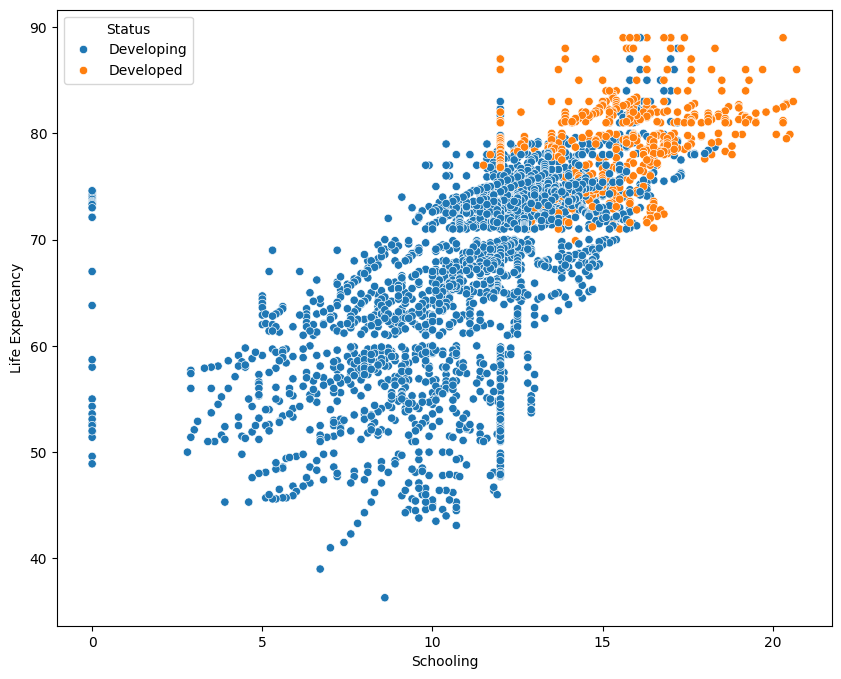

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Schooling', y = 'Life Expectancy', hue = 'Status')
plt.show()

* The plot shows upward pattern of life expectancy as the average year of schooling increases, suggesting more education levels lead to better life expectancy.

* Developed countries show significantly higher life expectancy on education levels than developing countries.

* Education is one of the factors of social determinants of health that impacts individual's health outcomes by affecting elements such as income, access to healthcare, and general lifestyle choices.

**Life Expectancy & Income Composition of Resources**

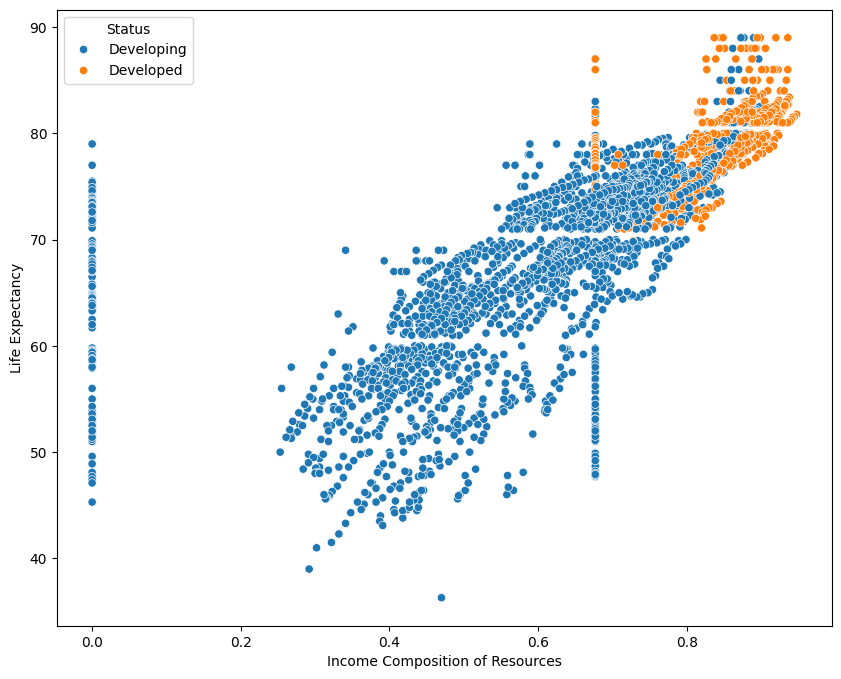

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Income Composition of Resources', y = 'Life Expectancy', hue = 'Status')
plt.show()

* Aligning with the education level, which is a major factor affecting the income positively influences the life expectancy.

* Developed countries have higher duration of schooling.

Life expectancy is closely related to socioeconomic development, public health investments, and education. Developed countries with higher health coverage, better education systems, and stronger economies consistently achieve longer and healthier lives, follwoing intuitive insights.

In [ ]:
df['Status'].value_counts(1)

Status
Developing   0.82573
Developed    0.17427
Name: proportion, dtype: float64

* As we can see there are much more developing countries than developed countries (imbalanced).

* While this is not classification task, we could try t-SNE (good for imbalanced data) to see how well clustered is the data.

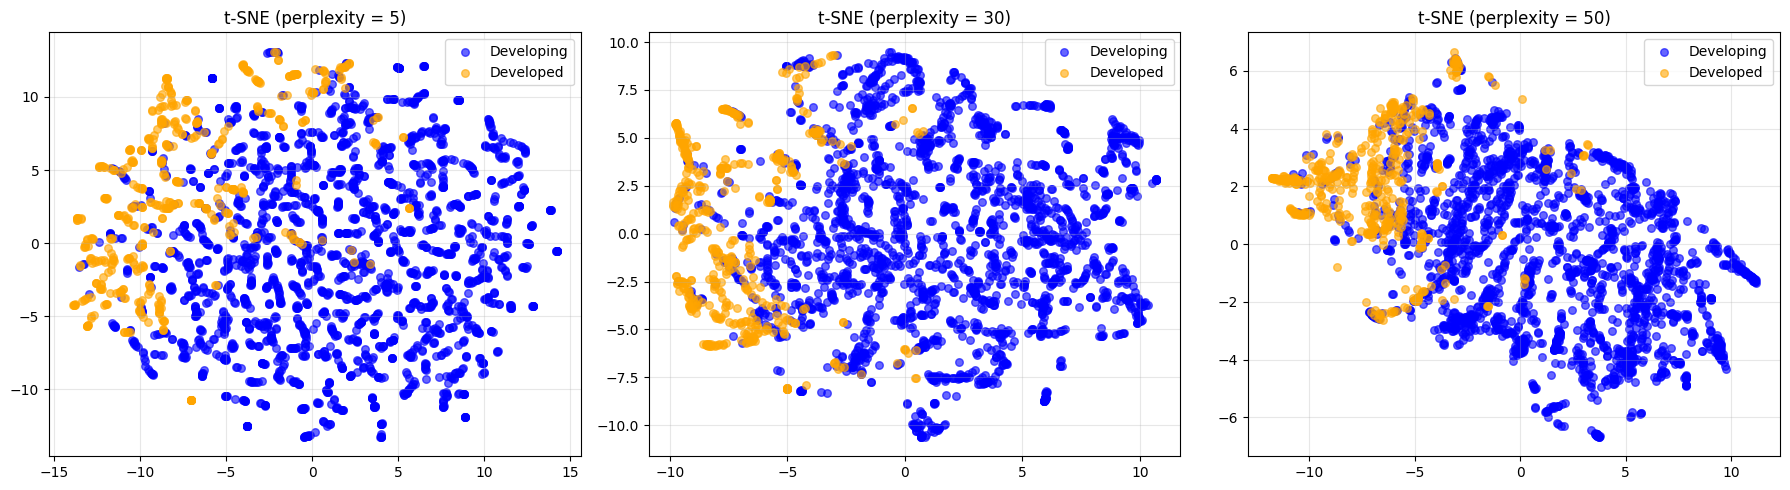

In [ ]:
from sklearn.manifold import TSNE

def visualize_clustering_tsne(df):
    """
    Use t-SNE to visualize status clustering (better for non-linear patterns).
    """
    # Select numeric features for scaling
    features = df.select_dtypes(include=[np.number]).drop(['Life Expectancy'], axis=1)
    features = features.fillna(features.mean())

    # Scale numeric features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Apply t-SNE with different perplexities
    perplexities = [5, 30, 50]

    # Set figure size on multiple plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Iterate through the perplexies and plot t-SNEs
    for i, perplexity in enumerate(perplexities):

        # Define t-SNE
        tsne = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, n_iter = 300)
        tsne_result = tsne.fit_transform(features_scaled)

        # Plot
        colors = {'Developed': 'orange', 'Developing': 'blue'}
        for status in df['Status'].unique():
            mask = df['Status'] == status
            axes[i].scatter(tsne_result[mask, 0], tsne_result[mask, 1],
                           c = colors[status], label = status, alpha = 0.6, s = 30)

        axes[i].set_title(f't-SNE (perplexity = {perplexity})')
        axes[i].legend()
        axes[i].grid(True, alpha = 0.3)

    plt.tight_layout()
    plt.show()

    return tsne_result

tsne_result = visualize_clustering_tsne(df)

* There are some overlaps, but data points representing developed and developing countries are well clustered, indicating possibly better performances from the models.

* Lets do statistical test to further prove this issue.

In [ ]:
from scipy.stats import kruskal

# Group life expectancy by region
groups = [group['Life Expectancy'].dropna()
          for _, group in df.groupby('Status')]

# Perform the Kruskal-Wallis test
stat, p = kruskal(*groups)

# Display the result
print(f"Kruskal-Wallis Test: statistic = {stat:.3f}, p-value = {p:.4f}")

Kruskal-Wallis Test: statistic = 873.182, p-value = 0.0000


* The Kruskal test is a test without specific assumptions.
tistical
* As p-value is under 0.05 threshold, two groups of countries are statistically significant differences.

* The feature engineering seems unnecessary for now as data points (developing/developed) are well-clustered and shows clear linear patterns from most of the features that developed countries have higher life expectancy.

## Data Preprocessing

### Outlier Checking

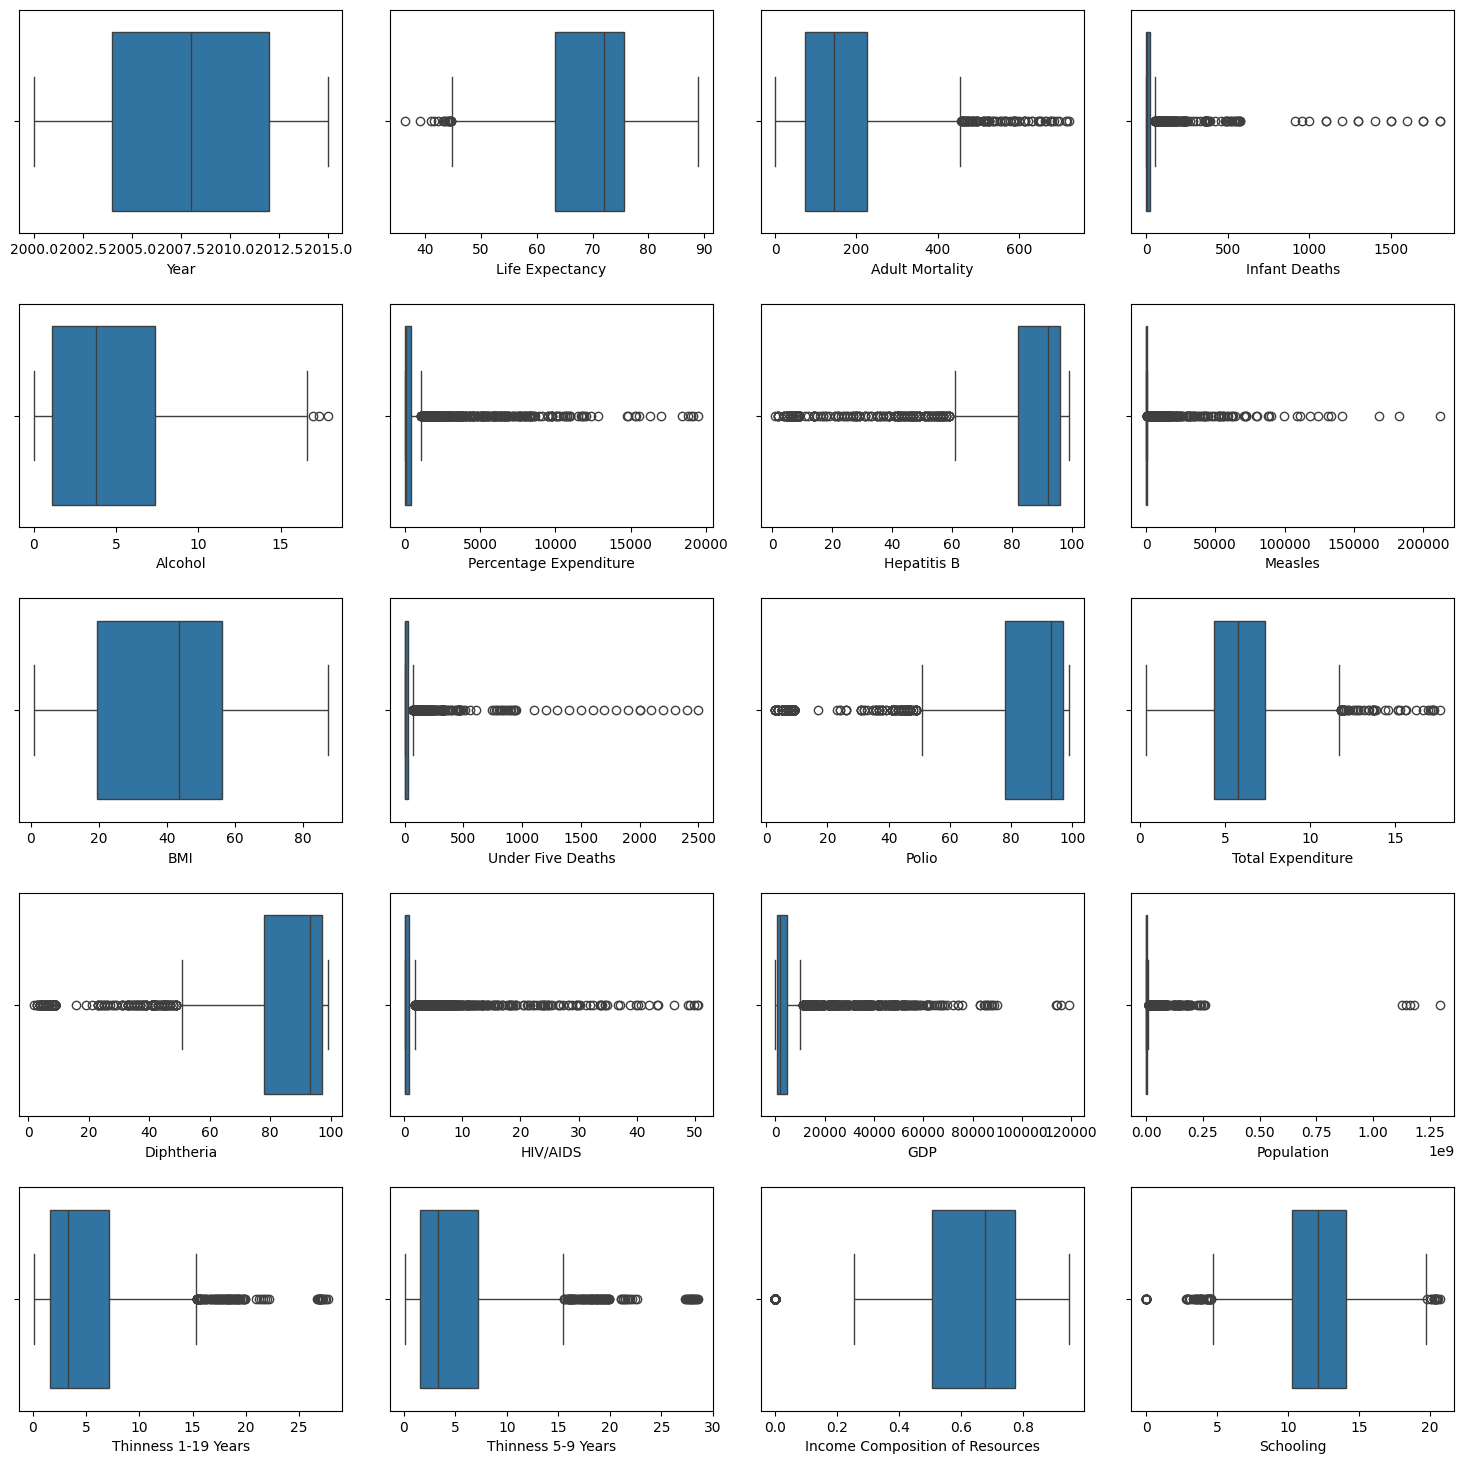

In [ ]:
# Plotting the outliers of numeric columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 15))

for i, variable in enumerate(num_cols):
      plt.subplot(5, 4, i + 1)
      sns.boxplot(data = df, x = variable)
      plt.tight_layout(pad = 2)
plt.show()

* Some of the features have a lot of outliers and heavily skewed.

* We will perform outlier analysis to figure out if they are legitimate data points with insights.

In [ ]:
def investigate_outliers(df, feature):
    """
    Investigate outliers with country context.
    """

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f'\nFeature: {feature}:\n')
    print(f"Number of outliers: {len(outliers)}")

    if len(outliers) > 0:
        print("Countries with outlier values:\n")
        print(outliers[['Country', 'Year', feature]].sort_values(feature, ascending=False).head(10))
        print('-' * 35)

    return outliers

In [ ]:
# Check extreme outliers
outlier_features = ['Adult Mortality', 'Infant Deaths', 'Percentage Expenditure', 'Measles', 'GDP', 'Population',
                    'HIV/AIDS', 'Under Five Deaths', 'Diphtheria', 'Thinness 1-19 Years', 'Thinness 5-9 Years',
                    'Hepatitis B', 'Polio']

# Print out the outliers in the selected features
for feature in outlier_features:
    outliers = investigate_outliers(df, feature)


Feature: Adult Mortality:

Number of outliers: 86
Countries with outlier values:

       Country  Year  Adult Mortality
2933  Zimbabwe  2004        723.00000
2932  Zimbabwe  2005        717.00000
2934  Zimbabwe  2003        715.00000
349   Botswana  2002        699.00000
348   Botswana  2003        693.00000
2936  Zimbabwe  2001        686.00000
1127     Haiti  2010        682.00000
350   Botswana  2001        679.00000
1484   Lesotho  2005        675.00000
1485   Lesotho  2004        666.00000
-----------------------------------

Feature: Infant Deaths:

Number of outliers: 315
Countries with outlier values:

     Country  Year  Infant Deaths
1201   India  2000           1800
1200   India  2001           1800
1199   India  2002           1700
1198   India  2003           1700
1197   India  2004           1600
1196   India  2005           1500
1195   India  2006           1500
1194   India  2007           1400
1192   India  2009           1300
1193   India  2008           1300
-------

**Intuitive Observation on the Outliers:**

* Adult Mortality: Countries such as Zimbabewe, Botswana, Haiti, and Lesotho are all developing countries, aligning with out binary visualization analysis.

* Infant Deaths: India is one of the countries with greatest population sizes, therefore India may have greatest infant deaths.

* Percentage Expenditure: Percentage expenditure of 19,479% is impossible, it would be better to drop the whole column.

* Measles: Nigeria, Democratic republic of Congo, and China are both populous, indicating possibility having infectious disease and they are all developing countries which aligns with the binary visual analysis.

* GDP: Luxembourg, Qatar, Norway, and Switherland are wealthy countries.

* HIV/AIDS: India/Indonesia size is real.

* Under Five Deaths: Same as infant deaths - may be caused by large population.

* HIV/AIDS: Swaziland and Zimbabwe are countries with serious HIV/AIDS problem.

* Hepatitis B: Countires like Viet Nam, Vanuatu, Samoa, Iraq, Papua New Guinea are developing countries, aligning with our binary visualization.

* Diptheria: Countries including Guinea-Bissau, Samoa, Nigeria, Lao People's Democratic Republic, Mali, and Haiti are developing countries, aligning with our binary visualization.

* Polio: Countries such as Chad, Somalia, Ligeria, nigeria, and Senegal are developing countries, aligning with our binary visualization.

* Thiness 1-19 & 5-9: India is a developing country with the largest population in the world, which aligns with our binary visualization.

Judging by the intuitive analysis, only percentage expenditure seems to have outliers without valuable insights.

## Data Preparation for Modeling - Dropping Influential Values (Cook's D) + Log transformation (Selected Attributes)

In [ ]:
# Drop Percentage Expenditure as its values seems unrealistic
df.drop('Percentage Expenditure', axis = 1, inplace = True)

In [ ]:
# Listing the numeric features of the data
num_cols = df.select_dtypes(include = np.number).columns.tolist()

# Preparing the features and target
X = df[num_cols].drop(['Life Expectancy'], axis=1)
y = df['Life Expectancy']

# Adding a constant to the model (intercept)
X1 = sm.add_constant(X)

# Fitting the model
model1 = sm.OLS(y, X).fit()

# Calculating Cook's distance
influence = OLSInfluence(model1)
cooks_d = influence.cooks_distance

In [ ]:
# Identifying influential points
n = len(df)
threshold = 4 / n
high_influence = np.where(cooks_d[0] > threshold)[0]

# Creating new dataframe
df1 = df.drop(high_influence)

* We dropped some influetial points, now let's log transform highly skewed features.

In [ ]:
# Variables without serious skewness
no_transform = ['Life expectancy', 'Alcohol', 'BMI', 'Income composition of resources', 'Schooling']

for col in df1[num_cols]:
  # Log transformation
    if col not in no_transform:
        df1[col] = np.log1p(df1[col])

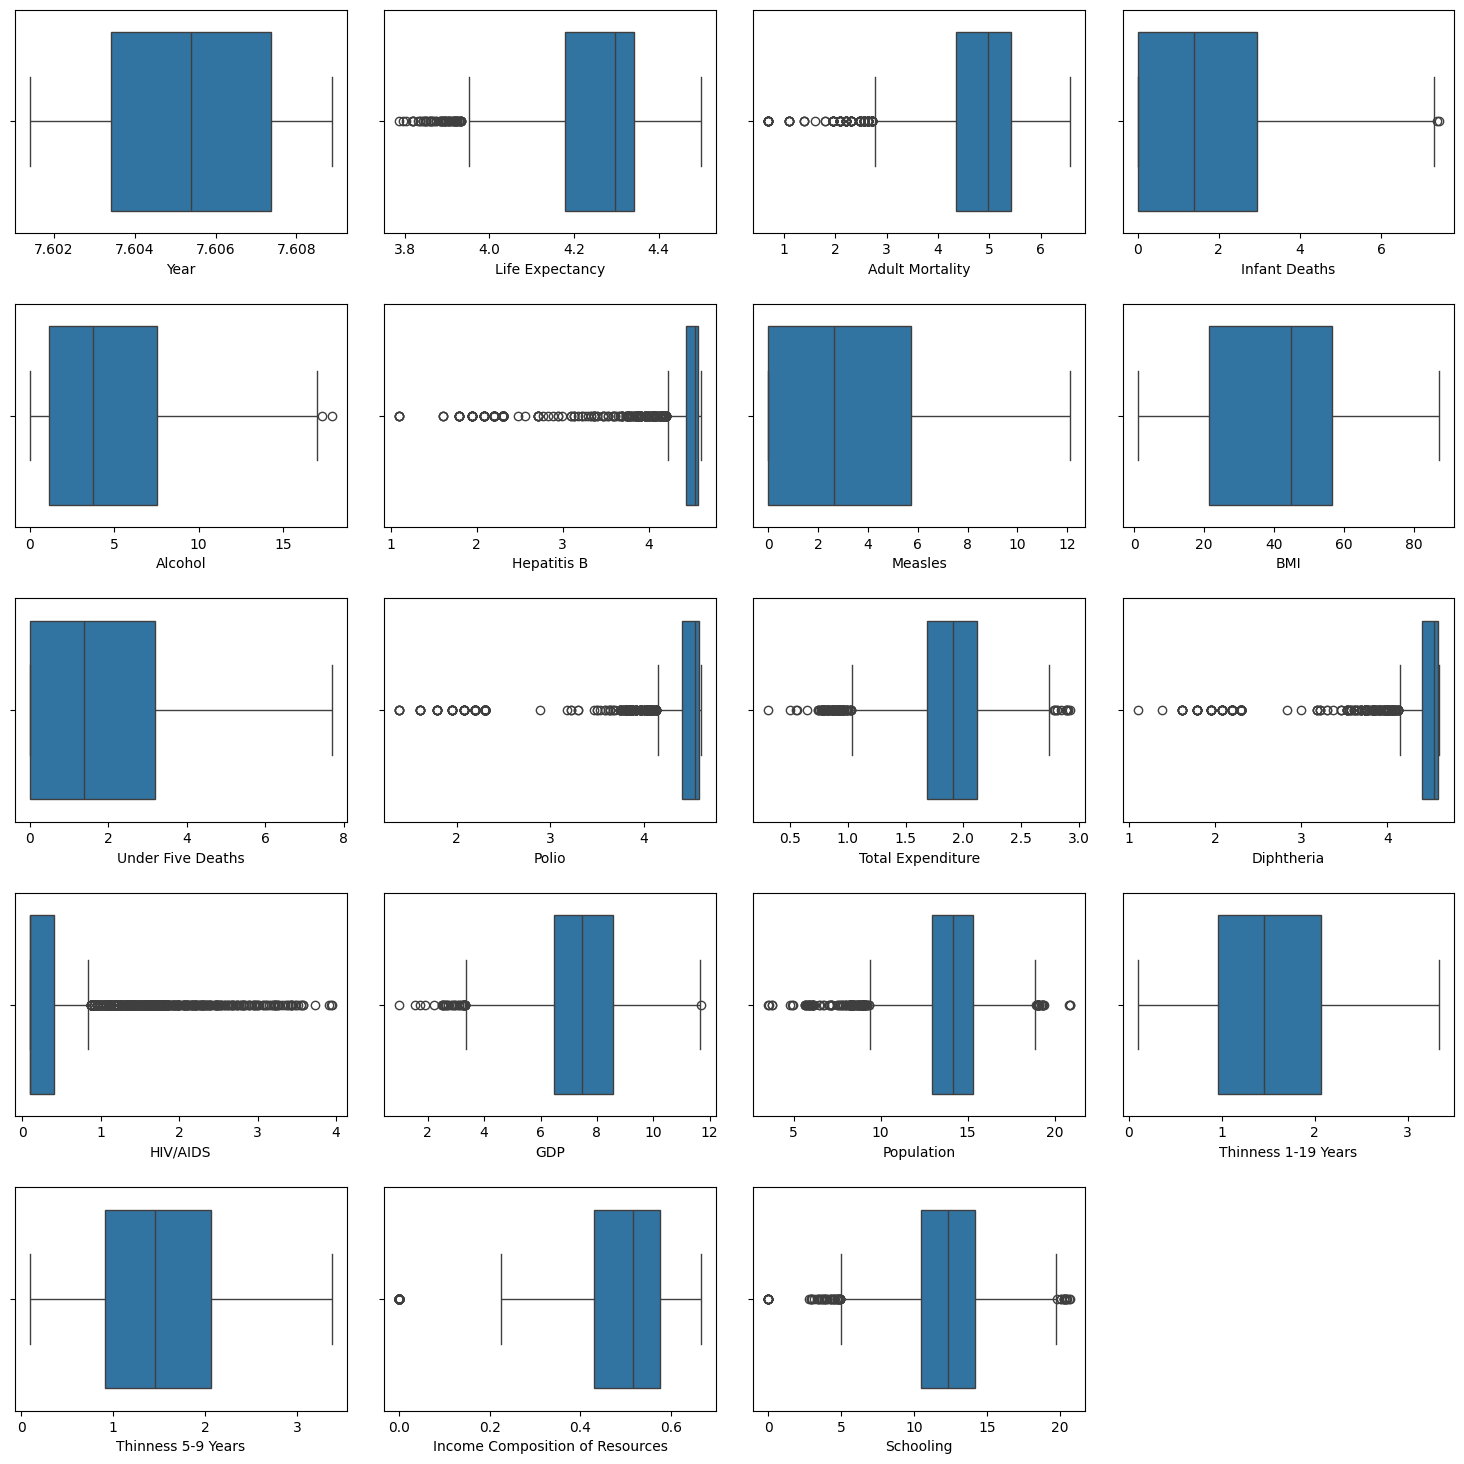

In [ ]:
# Plotting the outliers of numeric columns
plt.figure(figsize = (15, 15))

# Loop through the numeric columns and plot the distribution
for i, variable in enumerate(num_cols):
      plt.subplot(5, 4, i + 1)
      sns.boxplot(data = df1, x = variable)
      plt.tight_layout(pad = 2)

plt.show()

* Even after log transformation, some features are still highly skewed.

## Model Building - Linear Regression

In [ ]:
# Defining the dependent and independent features
# Drop Country column as there are 193 countries - difficult to encode or make dummy variables
X1 = df1.drop(['Life Expectancy', 'Country'], axis = 1) # Predictors
y1 = df1['Life Expectancy'] # Target

# Adding the intercept to data
X1 = sm.add_constant(X1)

# Creating dummy variables
X1 = pd.get_dummies(X1, columns = ['Status'], drop_first = True)

# Splitting the data in 70:30 ratio for train to test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

print('Number of observations in training data:', X_train1.shape[0])
print('Number of observations in test data:', X_test1.shape[0])

Number of observations in training data: 1914
Number of observations in test data: 821


In [ ]:
# Converting the boolean data types into integer data type
X_train1['Status_Developing'] = X_train1['Status_Developing'].astype(np.int64)

# Defining and fitting the model
olsmod = sm.OLS(y_train1, X_train1).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     610.8
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:58:14   Log-Likelihood:                 3028.6
No. Observations:                1914   AIC:                            -6017.
Df Residuals:                    1894   BIC:                            -5906.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations**

- The baseline life expectancy is 56.3854, representing the expected life expectancy when all predictors are zero.

- HIV/AIDS shows strong negative relationship with life expectancy.

- Income composition and schooling show highly positive relationship with life expectancy.

- Both the R-squared and Adjusted R squared of our model are greater than 0.8, indicating that it can explain more than 80% of the variance in life expectancy.

- Some features seem to be not statistically significant (p > 0.05), which indicates lower model quality and interpretability.

## Model Performance Check

* $R^2$, Adjusted $R^2$, Root mean squared error, Mean absolute error, and Mean absolute percentage error will be used as a standard to assess model performance.

In [ ]:
# Function to compute adjusted R-squared
def adjr2_score(predictors, target, predictions):
    """
    Calculates the adjusted R-squared value for a regression model.

    Parameters:
    - predictors: independent variables
    - target: target variable.
    - predictions: array of predicted values from the model.

    Output:
    - The adjusted R-squared score.
    """
    r2 = r2_score(target, predictions)
    n = predictors.shape[0]  # number of observations
    k = predictors.shape[1]  # number of predictors
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute Mean Absolute Percentage Error (MAPE)
def mape_score(target, predictions):
    """
    Calculates the Mean Absolute Percentage Error (MAPE) between actual and predicted values.

    Parameters:
    - target: target variable.
    - predictions: array of predicted values from the model.

    Output:
    - The MAPE score multiplied by 100.
    """
    return np.mean(np.abs(target - predictions) / target) * 100


# Function to compute and return model performance metrics
def model_performance_checker(model, predictors, target):
    """
    Evaluates a regression model using various performance metrics.

    Parameters:
    - model: A trained statsmodels OLS model.
    - target: target variable.
    - predictions: array of predicted values from the model.

    Output:
    Evaluation metrics including RMSE, MAE, R-Squared, Adjusted R-Squared, and MAPE.
    """
    # Generate predictions using the model
    pred = model.predict(predictors)

    # Calculate performance metrics
    r2 = r2_score(target, pred)
    adj_r2 = adjr2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Combine metrics into a DataFrame
    perf_df = pd.DataFrame({
        'R-Squared': r2,
        'Adj R-Squared': adj_r2,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }, index=[0])

    return perf_df

In [ ]:
# Printing the model performance for training and test data
print('Training Performance:')
olsmod_train_perf = model_performance_checker(olsmod, X_train1, y_train1)
print(olsmod_train_perf)
print('-' * 51)
print('Test Performance:')
olsmod_test_perf = model_performance_checker(olsmod, X_test1, y_test1)
print(olsmod_test_perf)

Training Performance:
   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.85969        0.85820 0.04972 0.03761 0.89082
---------------------------------------------------
Test Performance:
   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.86146        0.85799 0.04915 0.03767 0.88964


### Observations:

* The training and test scores are almost identical, indicating no overfitting.

* Low MAPE indicates very strong prediction accuracy.

* R² and Adjusted R² > 0.85 suggests a robust linear fit and right number of predictors.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST for Multicollinearity

In [ ]:
# Function to display the VIF of each attribute
def vif_checker(predictors):
      vif = pd.DataFrame()
      vif['Feature'] = predictors.columns

      # Calculating VIF for each feature
      vif['VIF'] = [variance_inflation_factor(predictors, i) for i in range(len(predictors.columns))]

      return vif

In [ ]:
# Displaying the VIF
vif_checker(X_train1)

Feature            VIF
0                             const 12587296.38067
1                              Year        1.14109
2                   Adult Mortality        1.33793
3                     Infant Deaths      161.42800
4                           Alcohol        1.90598
5                       Hepatitis B        1.19477
6                           Measles        1.73991
7                               BMI        1.82354
8                 Under Five Deaths      169.99263
9                             Polio        1.35206
10                Total Expenditure        1.19254
11                       Diphtheria        1.49967
12                         HIV/AIDS        1.67362
13                              GDP        1.71313
14                       Population        1.28828
15              Thinness 1-19 Years       14.34648
16               Thinness 5-9 Years       14.47170
17  Income Composition of Resources        2.67253
18                        Schooling        3.65726
19                Status_Developing        1.84301

**Observations**

* Some of the numerical variables show high multicollinearity
* We will ignore the VIF for the constant and the dummy variable (Status_Developing).

In [ ]:
# Dropping variable with high VIF
X_train2 = X_train1.drop(['Under Five Deaths'], axis = 1)
X_test2 = X_test1.drop(['Under Five Deaths'], axis = 1)

In [ ]:
# Displaying the VIF
vif_checker(X_train2)

Feature            VIF
0                             const 12508718.21116
1                              Year        1.13386
2                   Adult Mortality        1.33205
3                     Infant Deaths        2.81721
4                           Alcohol        1.90454
5                       Hepatitis B        1.19371
6                           Measles        1.73525
7                               BMI        1.81543
8                             Polio        1.35085
9                 Total Expenditure        1.19189
10                       Diphtheria        1.49559
11                         HIV/AIDS        1.54548
12                              GDP        1.71039
13                       Population        1.28649
14              Thinness 1-19 Years       14.33406
15               Thinness 5-9 Years       14.45643
16  Income Composition of Resources        2.67044
17                        Schooling        3.59578
18                Status_Developing        1.83214

**Observations:**
* There are still some features with high vif score over 5, we will continue to drop these features one by one until we get low vif score for all features.

In [ ]:
# Dropping variable with high VIF
X_train3 = X_train2.drop(['Thinness 5-9 Years'], axis = 1)
X_test3 = X_test2.drop(['Thinness 5-9 Years'], axis = 1)

In [ ]:
# Displaying the VIF
vif_checker(X_train3)

Feature            VIF
0                             const 12506209.20140
1                              Year        1.13363
2                   Adult Mortality        1.32957
3                     Infant Deaths        2.81041
4                           Alcohol        1.90340
5                       Hepatitis B        1.19349
6                           Measles        1.73168
7                               BMI        1.79985
8                             Polio        1.35042
9                 Total Expenditure        1.18763
10                       Diphtheria        1.49558
11                         HIV/AIDS        1.54378
12                              GDP        1.70567
13                       Population        1.28554
14              Thinness 1-19 Years        1.99687
15  Income Composition of Resources        2.66910
16                        Schooling        3.59385
17                Status_Developing        1.82489

**Observations:**
- None of the numerical variables have a VIF > 5 now.

### Dealing with P-Values

In [ ]:
# Defining and fitting the data
olsmodel = sm.OLS(y_train1, X_train3).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     659.9
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:58:15   Log-Likelihood:                 2999.9
No. Observations:                1914   AIC:                            -5964.
Df Residuals:                    1896   BIC:                            -5864.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations:**
* We can see that there are many features that are not statistically significant (p > 0.05). It is important to get rid of the values with high p-value over 0.05.

In [ ]:
# Setting the predictors and target
predictors = X_train3.copy()
target = y_train1.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_pval = 1

# Iterate through the features
while len(cols) > 0:
    # Defining the training set
    predictors_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(target, predictors_aux).fit()

    # Getting the p-values and maximum p-values
    p_values = model.pvalues
    max_pval = max(p_values)

    # Name of the variable with max p-value
    var_max_pval = p_values.idxmax()

    # If maximum p-value is over 0.05, remove it from the list
    if max_pval > 0.05:
          cols.remove(var_max_pval)
    else:
          break

# Check the features with statistical significance
statistically_significant = cols
statistically_significant

['Year',
 'Adult Mortality',
 'Infant Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 1-19 Years',
 'Income Composition of Resources',
 'Schooling',
 'Status_Developing']

**Observations:**

* The statistically significant attributes are selected.

In [ ]:
# Subsetting the data with selected variables
X_train4 = X_train3[statistically_significant]
X_test4 = X_test3[statistically_significant]

In [ ]:
# Defining and fitting the data
olsmodel1 = sm.OLS(y_train1, X_train4).fit()
print(olsmodel1.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.034e+06
Date:                Sun, 13 Jul 2025   Prob (F-statistic):                        0.00
Time:                        01:58:15   Log-Likelihood:                          2995.6
No. Observations:                1914   AIC:                                     -5965.
Df Residuals:                    1901   BIC:                                     -5893.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

**Observations:**
* All the features of the model are now statistically signifcant.

### Test for Linearity and Independence

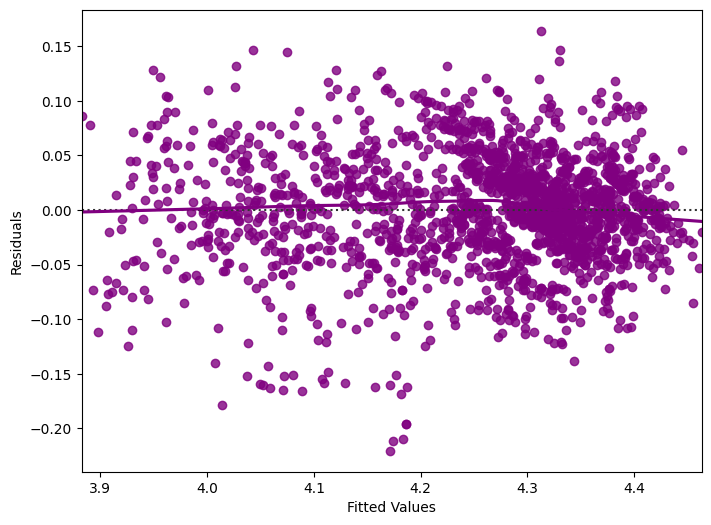

In [ ]:
# Creating a dataframe for fitted, and residuals values
df_pred = pd.DataFrame()

# Predicted values
df_pred['Fitted Values'] = olsmodel1.fittedvalues

# Residuals
df_pred['Residuals'] = olsmodel1.resid

# Plotting fitted values vs residuals
plt.figure(figsize = (8, 6))
sns.residplot(data = df_pred, x = 'Fitted Values', y = 'Residuals', lowess = True, color = 'purple')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Observations:**

* The residuals are randomly scattered around the horizontal axis (zero), and the LOWESS line remains relatively flat, suggesting no clear pattern, supporting the linearity assumption and fair accuracy of the predictions.
* There’s no obvious funnel shape or curvature, which suggests that homoscedasticity (constant variance of errors) and independence are reasonably met.
* No extreme outliers or clustering patterns are apparent.

### Test for Normality

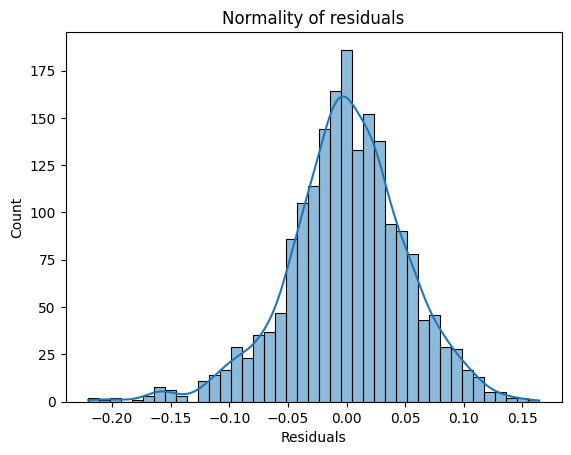

In [ ]:
# Residual distribution
sns.histplot(data = df_pred, x = "Residuals", kde = True)
plt.title("Normality of residuals")
plt.show()

**Observations:**
* The distribution is of residuals is not perfectly symmetric, but it shows distribution close to normal distribution.

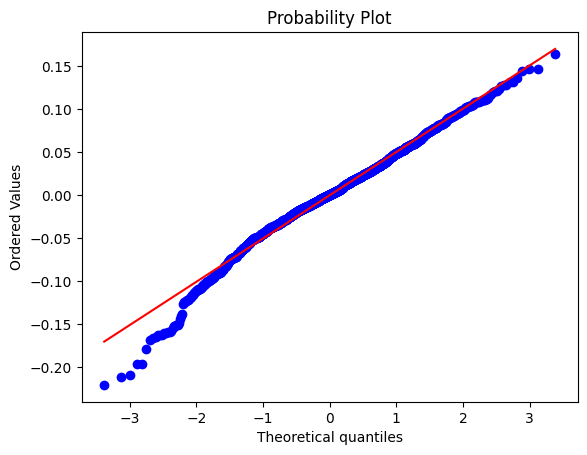

In [ ]:
## QQ-plot
stats.probplot(df_pred["Residuals"], dist = "norm", plot = pylab)
plt.show()

**Observations:**
- The residuals are more or less follow a straight line except for the bottom tail.

In [ ]:
# Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9863359880033433), pvalue=np.float64(1.5590795548130552e-12))

**Observations:**
* Judging by the eivdence shown from the test (p-value > 0.05), the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
* So, we take the assumption of normality as reasonably acceptable for practical purposes.

### Test for Homoscedasticity

In [ ]:
# Goldfeldquandt test
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', np.float64(1.1365945858096616)),
 ('p-value', np.float64(0.024967044265308207))]

* Since p-value > 0.05, it failed to reject the null hypothesis that the residuals are homoscedastic, suggesting the assumption of homoscedasticity is satisfied.
* All the linear regression assumptions are satisfied.

### Final Model

In [ ]:
X_train_final = X_train4.copy()
X_test_final = X_test4.copy()
y_train_final = y_train1.copy()
y_test_final = y_test1.copy()

In [ ]:
olsmod_final = sm.OLS(y_train_final, X_train_final).fit()
print(olsmod_final.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.034e+06
Date:                Sun, 13 Jul 2025   Prob (F-statistic):                        0.00
Time:                        01:58:17   Log-Likelihood:                          2995.6
No. Observations:                1914   AIC:                                     -5965.
Df Residuals:                    1901   BIC:                                     -5893.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
# Comparing the training and test performance of final model
olsmod_final_train_perf = model_performance_checker(olsmod_final, X_train_final, y_train_final)
olsmod_final_test_perf = model_performance_checker(olsmod_final, X_test_final, y_test_final)

print('Training Performance:\n', olsmod_final_train_perf)
print('-' * 51)
print('Test Performance:\n', olsmod_final_test_perf)

Training Performance:
    R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.85477        0.85377 0.05059 0.03840 0.90992
---------------------------------------------------
Test Performance:
    R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.85943        0.85717 0.04950 0.03813 0.90115


* Compared with the original model, the performance seems almost alike.

* However, this model satisfies all the assumptions.

### Key Interpretations:

* Adult Mortality and Infant Deaths have negative coefficients, suggesting that higher mortality rates are associated with lower life expectancy.

  * A unit increase in Adult Mortality is associated with a 1.39% decrease in life expectancy.
  * Similarly, an increase in Infant Deaths lowers life expectancy by approximately 1% per unit.

* HIV/AIDS has the strongest negative impact on life expectancy, with a coefficient of -0.0880, indicating that higher HIV prevalence substantially reduces life expectancy.

* Income Composition of Resources (coef: 0.1470) and Schooling (coef: 0.0080) shows that countries with better income equality and education tend to have longer life expectancy.

* GDP (coef: 0.0027) also contributes positively, but smaller than the previous features.

* Vaccination coverage, including Polio, Diphtheria, and Total Health Expenditure, all show statistically significant positive effects, supporting the importance of immunization programs and public health investment.

* The Status_Developing dummy variable is negative (-0.0119) and significant, implying that developing countries still tend to have slightly lower life expectancy.

---

### Insights:

The results show that life expectancy is mainly affected by health conditions, education, income, and access to healthcare. Countries with lower HIV rates, better education, higher income, and strong vaccination programs tend to have longer life expectancy. Improving these areas, especially in developing countries, can help people live longer and healthier lives.

Now that we have seen the results of traditional statistical model, let's see how well other advanced models interpret this data.

## Data Preprocessing for Further Analysis

In [ ]:
# Copy the original data for further analysis
data2 = data.copy()

# Get rid of the whitespace
data2.columns = data2.columns.str.strip()

# Function to replace missing values with median values
medianFiller = lambda x: x.fillna(x.median())

# Function to replace missing values with mean values
meanFiller = lambda x: x.fillna(x.mean())

# Setting the features that will be imputed with median values (excluding 'Schooling')
median_cols = [col for col in null_cols if col != 'Schooling']

# Apply median filler to selected columns
data2[median_cols] = data2[median_cols].apply(medianFiller)

# Apply mean filler to 'Schooling' column directly
data2['Schooling'] = meanFiller(data2['Schooling'])

# Rename columns
data2 = data2.rename(columns={
    'Life expectancy': 'Life Expectancy',
    'infant deaths': 'Infant Deaths',
    'percentage expenditure': 'Percentage Expenditure',
    'under-five deaths': 'Under Five Deaths',
    'thinness  1-19 years': 'Thinness 1-19 Years',
    'thinness 5-9 years': 'Thinness 5-9 Years',
    'Income composition of resources': 'Income Composition of Resources',
    'Total expenditure': 'Total Expenditure'
})

# Drop the Country column
data2.drop('Country', axis = 1, inplace = True)

# Copy the preprocessed data
df2 = data2.copy()
df3 = data2.copy()

* As there are models that require/do not require scaling, we will have seperate data for each purpose.

Datasets for models that does not require scaling

In [ ]:
# Defining the dependent and independent features
X2 = df2.drop('Life Expectancy', axis=1)
y2 = df2['Life Expectancy']

# One-hot encode categorical variables
X2 = pd.get_dummies(X2, drop_first = True)
X2['Status_Developing'] = X2['Status_Developing'].astype(int)

# Create train/validation/test splits
X_temp, X_test2, y_temp, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 1)

# Print the splitted number of rows
print(f"Splits - Train: {X_train2.shape[0]}, Validation: {X_val2.shape[0]}, Test: {X_test2.shape[0]}")

Splits - Train: 1762, Validation: 588, Test: 588


Datasets with for models that require scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 1. Define features and target
X3 = df3.drop('Life Expectancy', axis=1)
y3 = df3['Life Expectancy']

# 2. One-hot encode if needed
X3 = pd.get_dummies(X3, drop_first=True)
X3['Status_Developing'] = X3['Status_Developing'].astype(int)

# 3. Split the data
X_temp3, X_test3, y_temp3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_temp3, y_temp3, test_size=0.25, random_state=1)

## Quick Model Evaluation

* Various models will be divided into three groups and will be evaluated based on R² using KFold.

In [ ]:
# Group 1
models_group1 = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha = 1.0, random_state = 1)),
    ('Lasso', Lasso(alpha = 0.01, max_iter = 10000, random_state = 1)),
    ('ElasticNet', ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter = 10000, random_state = 1))
]

# Group 2
models_group2 = [
    ('Random Forest', RandomForestRegressor(random_state = 1)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state = 1)),
    ('XGBoost', XGBRegressor(random_state = 1, verbosity = 0))
]

# Group 3
models_group3 = [
    ('LightGBM', LGBMRegressor(random_state = 1, verbose = -1)),
    ('CatBoost', CatBoostRegressor(random_state = 1, verbose = 0)),
    ('HistGradientBoosting', HistGradientBoostingRegressor(random_state = 1))
]

# Define KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [ ]:
# Model performance evaluation function for models that does not require scaling
def evaluate_models_group(models_group, X_train, y_train, X_val, y_val, kfold):
    """
    Evaluates multiple regression models using k-fold cross-validation and R².

    Parameters
    - models_group: A list of models with their name and defined regressor.
    - X_train, y_train: Training data.
    - X_val, y_val: Validation data.
    - kfold: A KFold object for cross-validation.

    Output
    - Training and validation performances comparison for each model.
    """

    # Print the group name
    print(f"\nPerformance Comparison\n")

    # Iterate through the models and calculate cross-validated R²
    for name, model in models_group:
        print(f"\n{name.upper()}")  # Model name

        # Cross-validation R²
        scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'r2')
        print(f"CV R² (Train): {scores.mean():.4f}")

        # Fit the model
        model.fit(X_train, y_train)

        # Training Performance
        train_pred = model.predict(X_train)
        train_r2 = r2_score(y_train, train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        train_mae = mean_absolute_error(y_train, train_pred)
        train_mape = mean_absolute_percentage_error(y_train, train_pred) * 100
        n_train, p = len(y_train), X_train.shape[1]
        train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

        print(f"Train R²: {train_r2:.4f}")
        print(f"Train Adj R²: {train_adj_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.4f}")
        print(f"Train MAE: {train_mae:.4f}")
        print(f"Train MAPE: {train_mape:.4f}")
        print('-' * 30)

        # Validation Performance
        val_pred = model.predict(X_val)
        val_r2 = r2_score(y_val, val_pred)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
        val_mae = mean_absolute_error(y_val, val_pred)
        val_mape = mean_absolute_percentage_error(y_val, val_pred) * 100
        n_val = len(y_val)
        val_adj_r2 = 1 - (1 - val_r2) * (n_val - 1) / (n_val - p - 1)

        print(f"Validation R²: {val_r2:.4f}")
        print(f"Validation Adj R²: {val_adj_r2:.4f}")
        print(f"Validation RMSE: {val_rmse:.4f}")
        print(f"Validation MAE: {val_mae:.4f}")
        print(f"Validation MAPE: {val_mape:.4f}")

In [ ]:
# Model performance evaluation function for models requiring scaling
def evaluate_models_group_scaled(models_group, X_train, y_train, X_val, y_val, kfold):
    """
    Evaluates multiple regression models using scaling and k-fold cross-validation.

    Parameters:
    - models_group: A list of models with their name and estimator.
    - X_train, y_train: Training data.
    - X_val, y_val: Validation data.
    - kfold: KFold splitter.

    Output:
    - Prints performance metrics on both training and validation sets.
    """

    # Select numeric columns for scaling
    scale_cols = [col for col in X_train.columns if col not in ['Year', 'Status_Developing']]

    print(f"\nPerformance Comparison (Scaled Data)\n")

    for name, model in models_group:
        print(f"\n{name.upper()}")

        # Define a pipeline: scaling + model
        preprocessor = ColumnTransformer(
            transformers = [
                ('num', StandardScaler(), scale_cols)
            ],
            remainder = 'passthrough'  # keep non-scaled columns
        )

        pipeline = Pipeline(steps = [
            ('preprocessing', preprocessor),
            ('model', model)
        ])

        # Cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv = kfold, scoring = 'r2')
        print(f"CV R² (Train): {scores.mean():.4f}")

        # Fit pipeline
        pipeline.fit(X_train, y_train)

        # Train predictions
        train_pred = pipeline.predict(X_train)
        train_r2 = r2_score(y_train, train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        train_mae = mean_absolute_error(y_train, train_pred)
        train_mape = mean_absolute_percentage_error(y_train, train_pred) * 100
        n_train, p = len(y_train), X_train.shape[1]
        train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

        print(f"Train R²: {train_r2:.4f}")
        print(f"Train Adj R²: {train_adj_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.4f}")
        print(f"Train MAE: {train_mae:.4f}")
        print(f"Train MAPE: {train_mape:.4f}")
        print('-' * 30)

        # Validation predictions
        val_pred = pipeline.predict(X_val)
        val_r2 = r2_score(y_val, val_pred)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
        val_mae = mean_absolute_error(y_val, val_pred)
        val_mape = mean_absolute_percentage_error(y_val, val_pred) * 100
        n_val = len(y_val)
        val_adj_r2 = 1 - (1 - val_r2) * (n_val - 1) / (n_val - p - 1)

        print(f"Validation R²: {val_r2:.4f}")
        print(f"Validation Adj R²: {val_adj_r2:.4f}")
        print(f"Validation RMSE: {val_rmse:.4f}")
        print(f"Validation MAE: {val_mae:.4f}")
        print(f"Validation MAPE: {val_mape:.4f}")

### Group 1

In [ ]:
# Evaluate performance on group 1 models
evaluate_models_group_scaled(models_group1, X_train3, y_train3, X_val3, y_val3, kfold)


Performance Comparison (Scaled Data)


LINEAR REGRESSION
CV R² (Train): 0.8222
Train R²: 0.8289
Train Adj R²: 0.8270
Train RMSE: 3.9954
Train MAE: 3.0012
Train MAPE: 4.5902
------------------------------
Validation R²: 0.8110
Validation Adj R²: 0.8044
Validation RMSE: 4.0171
Validation MAE: 2.9705
Validation MAPE: 4.4853

RIDGE
CV R² (Train): 0.8219
Train R²: 0.8287
Train Adj R²: 0.8268
Train RMSE: 3.9976
Train MAE: 3.0031
Train MAPE: 4.5914
------------------------------
Validation R²: 0.8105
Validation Adj R²: 0.8038
Validation RMSE: 4.0234
Validation MAE: 2.9698
Validation MAPE: 4.4848

LASSO
CV R² (Train): 0.8214
Train R²: 0.8282
Train Adj R²: 0.8262
Train RMSE: 4.0036
Train MAE: 3.0027
Train MAPE: 4.5909
------------------------------
Validation R²: 0.8102
Validation Adj R²: 0.8035
Validation RMSE: 4.0265
Validation MAE: 2.9675
Validation MAPE: 4.4844

ELASTICNET
CV R² (Train): 0.8183
Train R²: 0.8253
Train Adj R²: 0.8233
Train RMSE: 4.0372
Train MAE: 3.0334
Train MAPE: 4.6389
--

### Group 2

In [ ]:
# Evaluate performance on group 2 models
evaluate_models_group(models_group2, X_train2, y_train2, X_val2, y_val2, kfold)


Performance Comparison


RANDOM FOREST
CV R² (Train): 0.9506
Train R²: 0.9938
Train Adj R²: 0.9938
Train RMSE: 0.7586
Train MAE: 0.4872
Train MAPE: 0.7414
------------------------------
Validation R²: 0.9607
Validation Adj R²: 0.9593
Validation RMSE: 1.8315
Validation MAE: 1.1409
Validation MAPE: 1.7002

GRADIENT BOOSTING
CV R² (Train): 0.9378
Train R²: 0.9651
Train Adj R²: 0.9647
Train RMSE: 1.8033
Train MAE: 1.3298
Train MAPE: 1.9582
------------------------------
Validation R²: 0.9421
Validation Adj R²: 0.9400
Validation RMSE: 2.2241
Validation MAE: 1.5532
Validation MAPE: 2.3102

XGBOOST
CV R² (Train): 0.9504
Train R²: 0.9997
Train Adj R²: 0.9996
Train RMSE: 0.1805
Train MAE: 0.1277
Train MAPE: 0.1862
------------------------------
Validation R²: 0.9575
Validation Adj R²: 0.9560
Validation RMSE: 1.9057
Validation MAE: 1.2552
Validation MAPE: 1.8877


### Group 3

In [ ]:
# Evaluate performance on group 3 models
evaluate_models_group(models_group3, X_train2, y_train2, X_val2, y_val2, kfold)


Performance Comparison


LIGHTGBM
CV R² (Train): 0.9550
Train R²: 0.9928
Train Adj R²: 0.9927
Train RMSE: 0.8207
Train MAE: 0.5613
Train MAPE: 0.8286
------------------------------
Validation R²: 0.9597
Validation Adj R²: 0.9583
Validation RMSE: 1.8546
Validation MAE: 1.2178
Validation MAPE: 1.8063

CATBOOST
CV R² (Train): 0.9569
Train R²: 0.9942
Train Adj R²: 0.9941
Train RMSE: 0.7385
Train MAE: 0.5274
Train MAPE: 0.7716
------------------------------
Validation R²: 0.9616
Validation Adj R²: 0.9602
Validation RMSE: 1.8118
Validation MAE: 1.1961
Validation MAPE: 1.8023

HISTGRADIENTBOOSTING
CV R² (Train): 0.9540
Train R²: 0.9928
Train Adj R²: 0.9927
Train RMSE: 0.8180
Train MAE: 0.5527
Train MAPE: 0.8155
------------------------------
Validation R²: 0.9604
Validation Adj R²: 0.9590
Validation RMSE: 1.8388
Validation MAE: 1.1937
Validation MAPE: 1.7823


* From each group we select HistGradient Boosting, CatBoost, and LightGBM for their best performances in their group for hyper-parameter tuning.

## Model Training - Hyper Parameter Tuning

### HistGradientBoosting

In [ ]:
# Hyper-parameter Tuning for HistGradientBoostingRegressor

%%time

# Defining model
hgb = HistGradientBoostingRegressor(random_state = 1)

# Parameters to pass in RandomizedSearchCV
hgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_leaf_nodes': [15, 31, 63, 127],
    'l2_regularization': [0.0, 0.1, 1.0, 10.0],
    'early_stopping': [True],  # keep for regularization
}

# Calling RandomizedSearchCV
hgb_randomized = RandomizedSearchCV(
    estimator = hgb,
    param_distributions = hgb_params,
    n_iter = 50,
    cv = 5,
    scoring = 'r2',
    random_state = 1,
    n_jobs = -1
)

# Fitting parameters in RandomizedSearchCV
hgb_randomized.fit(X_train2, y_train2)

# Print the best parameters and best score
print("Best parameters are {} with CV score = {:.4f}".format(
    hgb_randomized.best_params_, hgb_randomized.best_score_
))

Best parameters are {'min_samples_leaf': 5, 'max_leaf_nodes': 31, 'max_iter': 300, 'max_depth': 20, 'learning_rate': 0.05, 'l2_regularization': 1.0, 'early_stopping': True} with CV score = 0.9564
CPU times: user 44.5 s, sys: 810 ms, total: 45.4 s
Wall time: 3min 57s


In [ ]:
# Tune and fit the model
hgb_reg = HistGradientBoostingRegressor(random_state = 1, max_leaf_nodes = 31, max_iter = 300, max_depth = 20,
                              learning_rate = 0.05, l2_regularization = 1.0, early_stopping = True
                              )

hgb_reg.fit(X_train2, y_train2)

HistGradientBoostingRegressor(early_stopping=True, l2_regularization=1.0,
                              learning_rate=0.05, max_depth=20, max_iter=300,
                              random_state=1)

In [ ]:
# Model performance comparison between training and validation data
print('Training Performance:\n')
hgb_train_perf = model_performance_checker(hgb_reg, X_train2, y_train2)
print(hgb_train_perf)
print('-' * 50)

print('Validation Performance:\n')
hgb_val_perf = model_performance_checker(hgb_reg, X_val2, y_val2)
print(hgb_val_perf)

Training Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.98979        0.98967 0.97599 0.60971 0.90881
--------------------------------------------------
Validation Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.95536        0.95378 1.95264 1.25336 1.87062


* Validation R² > 0.95 is rare and indicates a powerful predictive model.

* The model seems to capture nonlinear interactions very effectively.

* However, the validation data shows twice the error rate in RMSE, MAE, and MAPE, but it is acceptable.

* We take this model to be the final HistGradientBoosting regressor model.

In [ ]:
# Model performance on the test data
print('Test Performance:\n')
hgb_final = model_performance_checker(hgb_reg, X_test2, y_test2)
print(hgb_final)

Test Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.95545        0.95388 1.96241 1.26477 1.91175


### CatBoost

In [ ]:
# Hyper-parameter Tuning

%%time

# Defining model
cat = CatBoostRegressor(random_state = 1, verbose = 0)

# Parameters to pass in RandomizedSearchCV
cat_params = {
    'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9, 10],
    'bagging_temperature': [0, 0.25, 0.5, 1.0],
    'border_count': [32, 64, 128],
    'random_strength': [0.5, 1, 2, 5, 10],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'boosting_type': ['Ordered', 'Plain'],
    'min_data_in_leaf': [1, 5, 10, 20]
}

# Calling RandomizedSearchCV
cat_randomized = RandomizedSearchCV(
    estimator = cat,
    param_distributions = cat_params,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    random_state = 1,
    n_jobs = -1
)

# Fitting parameters in RandomizedSearchCV
cat_randomized.fit(X_train2, y_train2)

# Print the best parameters and best score
print("Best parameters are {} with CV score = {:.4f}".format(
    cat_randomized.best_params_, cat_randomized.best_score_
))

Best parameters are {'random_strength': 0.5, 'min_data_in_leaf': 10, 'learning_rate': 0.2, 'l2_leaf_reg': 9, 'iterations': 500, 'grow_policy': 'Lossguide', 'depth': 10, 'border_count': 128, 'boosting_type': 'Plain', 'bagging_temperature': 1.0} with CV score = 0.9539
CPU times: user 58.6 s, sys: 1.24 s, total: 59.8 s
Wall time: 5min 28s


In [ ]:
# Tune and fit the model
cat_reg = CatBoostRegressor(random_state = 1, verbose = 0, random_strength = 0.5, min_data_in_leaf = 10,
                            learning_rate = 0.2, l2_leaf_reg = 9, iterations = 500, grow_policy = 'Lossguide',
                            depth = 10, border_count = 128, boosting_type = 'Plain', bagging_temperature = 1.0)

cat_reg.fit(X_train2, y_train2)

In [ ]:
# Model comparison between training and validation data
print('Training Performance:\n')
cat_train_perf = model_performance_checker(cat_reg, X_train2, y_train2)
print(cat_train_perf)
print('-' * 50)

print('Validation Performance:\n')
cat_val_perf = model_performance_checker(cat_reg, X_val2, y_val2)
print(cat_val_perf)

Training Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.99992        0.99992 0.08503 0.05921 0.08550
--------------------------------------------------
Validation Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.96214        0.96080 1.79820 1.18622 1.76965


* CatBoost achieves better validation R² than Histgradient Boosting model, showing powerful predictive capabilities.

* However, the training performance is unrealistically good, with validation error increasing 20× (RMSE, MAE, MAPE).

* This suggests the model memorized the training data too well, which limits generalizability.

In [ ]:
# Model performance on test data
print('Test Performance:\n')
cat_final = model_performance_checker(cat_reg, X_test2, y_test2)
print(cat_final)

### LightGBM

* As LightGBM internally uses column names in its booster config so we will replace whitespaces with underbars.

In [ ]:
# Copy the X datas
X_train2_ = X_train2.copy()
X_val2_ = X_val2.copy()
X_test2_ = X_test2.copy()

# Replace whitespaces with underbars
X_train2_.columns = X_train2_.columns.str.replace(' ', '_')
X_val2_.columns = X_val2_.columns.str.replace(' ', '_')
X_test2_.columns = X_test2_.columns.str.replace(' ', '_')

In [ ]:
# Hyper-parameter Tuning

%%time

# Defining model
lgb = LGBMRegressor(random_state = 1)

# Parameters to pass in RandomizedSearchCV
lgb_params = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 20, 30],
    'min_child_samples': [5, 10, 20, 50],
    'min_child_weight': [1e-3, 1e-2, 1e-1, 1],
    'subsample': [0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'boosting_type': ['gbdt', 'dart', 'goss']
}

# Calling RandomizedSearchCV
lgb_randomized = RandomizedSearchCV(
    estimator = lgb,
    param_distributions = lgb_params,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    random_state = 1,
    n_jobs = -1
)

# Fitting parameters in RandomizedSearchCV
lgb_randomized.fit(X_train2_, y_train2)

# Print the best parameters with best score
print("Best parameters are {} with CV score = {:.4f}".format(
    lgb_randomized.best_params_, lgb_randomized.best_score_
))

Best parameters are {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'num_leaves': 63, 'n_estimators': 1000, 'min_child_weight': 0.01, 'min_child_samples': 10, 'max_depth': 30, 'learning_rate': 0.01, 'colsample_bytree': 0.8, 'boosting_type': 'gbdt'} with CV score = 0.9608
CPU times: user 23.9 s, sys: 437 ms, total: 24.3 s
Wall time: 1min 39s


In [ ]:
# Tune and fit the model
lgb_reg = LGBMRegressor(random_state = 1, verbose = 0, subsample = 0.8, reg_lambda = 0.1,
                        reg_alpha = 0.0, num_leaves = 63, n_estimators = 1000, min_child_weight = 0.01,
                        min_child_samples = 10, max_depth = 30, learning_rate = 0.01, colsample_bytree = 0.8,
                        boosting_type = 'gbdt')

# Fit the model
lgb_reg.fit(X_train2_, y_train2)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=30,
              min_child_samples=10, min_child_weight=0.01, n_estimators=1000,
              num_leaves=63, random_state=1, reg_lambda=0.1, subsample=0.8,
              verbose=0)

In [ ]:
# Model comparison between training and validation data
print('Training Performance:\n')
lgb_train_perf = model_performance_checker(lgb_reg, X_train2_, y_train2)
print(lgb_train_perf)
print('-' * 50)

print('Validation Performance:\n')
lgb_val_perf = model_performance_checker(lgb_reg, X_val2_, y_val2)
print(lgb_val_perf)

Training Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.99859        0.99858 0.36215 0.22811 0.33727
--------------------------------------------------
Validation Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.96764        0.96650 1.66241 1.04078 1.53819


* LightGBM shows a strong balance between training fit and validation generalization.

* It outperforms CatBoost by avoiding extreme overfitting.

* Validation R² of 0.9676 is the highest yet, and MAPE of 1.54% confirms high precision.

In [ ]:
# Model performance on test data
print('Test Performance:\n')
lgb_final = model_performance_checker(lgb_reg, X_test2_, y_test2)
print(lgb_final)

Test Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.96423        0.96297 1.75845 1.11792 1.67555


* We will also try model evaluation on MLP Regressor and Stacking Regressor as well.

## MLP Regressor

In [ ]:
# Defining the dependent and independent features
X = df2.drop('Life Expectancy', axis=1)
y = df2['Life Expectancy']

# Select numeric columns fir scaling
num_cols = X.select_dtypes(include = np.number).columns.tolist()

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first = True)
X['Status_Developing'] = X['Status_Developing'].astype(int)

# Create train/validation/test splits
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 1)

# Print the splitted number of rows
print(f"Splits - Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# Scale numerical features (fit on training, transform on all)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Splits - Train: 1762, Validation: 588, Test: 588


In [ ]:
# Hyper-parameter Tuning

%%time

# Defining model
mlp = MLPRegressor(max_iter=1000, random_state=1)

# Parameters to pass in RandomizedSearchCV
mlp_params = {
    'hidden_layer_sizes': [(64,), (100,), (100, 50), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Calling RandomizedSearchCV
mlp_randomized = RandomizedSearchCV(
    estimator = mlp,
    param_distributions = mlp_params,
    n_iter = 10,
    cv = 5,
    scoring = 'r2',
    random_state = 1,
    n_jobs = -1
)

# Fitting parameters in RandomizedSearchCV
mlp_randomized.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters are {} with CV score = {:.4f}".format(
    mlp_randomized.best_params_, mlp_randomized.best_score_
))

Best parameters are {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (128, 64), 'alpha': 0.001, 'activation': 'tanh'} with CV score = 0.9313
CPU times: user 3min 54s, sys: 2.34 s, total: 3min 56s
Wall time: 10min 58s


In [ ]:
# Tune and fit the model
mlp_reg = MLPRegressor(random_state = 1, max_iter = 1000, solver = 'adam', learning_rate = 'adaptive',
                       hidden_layer_sizes = (128, 64), alpha = 0.001, activation = 'tanh')

mlp_reg.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(128, 64),
             learning_rate='adaptive', max_iter=1000, random_state=1)

In [ ]:
# Model performance comparison between training and validation data
print('Training Performance:\n')
mlp_train_perf = model_performance_checker(mlp_reg, X_train, y_train)
print(mlp_train_perf)
print('-' * 50)

print('Validation Performance:\n')
mlp_val_perf = model_performance_checker(mlp_reg, X_val, y_val)
print(mlp_val_perf)

Training Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.98608        0.98592 1.13971 0.72920 1.02605
--------------------------------------------------
Validation Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.92176        0.91900 2.58495 1.63765 2.47672


* MLP (Neural Net) shows great performance and generalization but does not outperform other models.

* Its validation error is highest across all tested models so far.

* We take this model to be the final MLP regressor model.

In [ ]:
# Model performance on the test data
print('Test Performance:\n')
mlp_final = model_performance_checker(mlp_reg, X_test, y_test)
print(mlp_final)

Test Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.94123        0.93916 2.25399 1.58401 2.36880


## Stacking Regressor

The combination for stacking regressor will be consisted of 3 models

* Random Forest: Good at handling complex patterns.

* KNN: Simple and based on nearby data points.

* Gradient Boosting: Strong model that reduces error step by step.

* Ridge: Prevents overfitting through L2 regularization and maintains linear interpretability.

As the data is well clustered and shows great linearity patterns, this combination of models may show outstanding results.

In [ ]:
%%time

# Stacking models
base_models = [
    ('rf', RandomForestRegressor(n_estimators = 200, random_state = 1)),
    ('knn', KNeighborsRegressor(n_neighbors = 5)),
    ('gbr', GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state = 1))
]

# Final estimator
meta_model = meta_model = Ridge(alpha = 1.0)

# Define Stacking Regressor
stack_reg = StackingRegressor(
    estimators = base_models,
    final_estimator = meta_model,
    cv = 5,
    n_jobs = -1
)

# Fit on training set
stack_reg.fit(X_train3, y_train3)

CPU times: user 9.42 s, sys: 447 ms, total: 9.87 s
Wall time: 45.1 s


StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=1)),
                              ('knn', KNeighborsRegressor()),
                              ('gbr',
                               GradientBoostingRegressor(n_estimators=200,
                                                         random_state=1))],
                  final_estimator=Ridge(), n_jobs=-1)

In [ ]:
# Model performance comparison between training and validation data
print('Training Performance:\n')
stack_train_perf = model_performance_checker(stack_reg, X_train3, y_train3)
print(stack_train_perf)
print('-' * 50)

print('Validation Performance:\n')
stack_val_perf = model_performance_checker(stack_reg, X_val3, y_val3)
print(stack_val_perf)

Training Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.99218        0.99209 0.85399 0.58623 0.86866
--------------------------------------------------
Validation Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.96079        0.95940 1.83001 1.15154 1.70759


* The Stacking Regressor shows balanced and consistent performance across training and validation.

* It achieves slightly better R² than HistGradient, and MAPE is lower than MLP and close to LightGBM.

* This may be the best model so fat.

* We take this model to be the final Stacking regressor model.

In [ ]:
# Model performance on test data
print('Test Performance:\n')
stack_final = model_performance_checker(stack_reg, X_test3, y_test3)
print(stack_final)

Test Performance:

   R-Squared  Adj R-Squared    RMSE     MAE    MAPE
0    0.95900        0.95755 1.88272 1.22631 1.84376


In [ ]:
# Comparing the test performance on tuned models
test_comp_df = pd.concat(
    [
        hgb_final.T,
        cat_final.T,
        lgb_final.T,
        mlp_final.T,
        stack_final.T
    ],
    axis=1,
)

# Set columns for the dataframe
test_comp_df.columns = [
    "HistGradientBoosting Regressor",
    "CatBoost Regressor",
    "LightGBM Regressor",
    "MLP Regressor",
    "Stacking Regressor"
]

print("Test performance comparison:")
test_comp_df

Test performance comparison:


HistGradientBoosting Regressor  CatBoost Regressor  \
R-Squared                             0.95545             0.95851   
Adj R-Squared                         0.95388             0.95705   
RMSE                                  1.96241             1.89381   
MAE                                   1.26477             1.24544   
MAPE                                  1.91175             1.86052   

               LightGBM Regressor  MLP Regressor  Stacking Regressor  
R-Squared                 0.96423        0.94123             0.95900  
Adj R-Squared             0.96297        0.93916             0.95755  
RMSE                      1.75845        2.25399             1.88272  
MAE                       1.11792        1.58401             1.22631  
MAPE                      1.67555        2.36880             1.84376

* The LigtGBM regressor not only generalizes best but also maintains the lowest error rates and highest explanatory power on unseen data.

* This will be our best model for prediction on life expectancy.

* While the performance of the model is exceptionally high and seem unrealistic, this could be explained partially by how well the data is clustered (on Status) as we have seen with t-SNE, making it much easier for the model to make predictions.

* Moreover, Kruskal-Wallis test (p < 0.05) statistically confirmed significant differences between country status (developed/developing).

PermutationExplainer explainer: 101it [18:01, 10.82s/it]


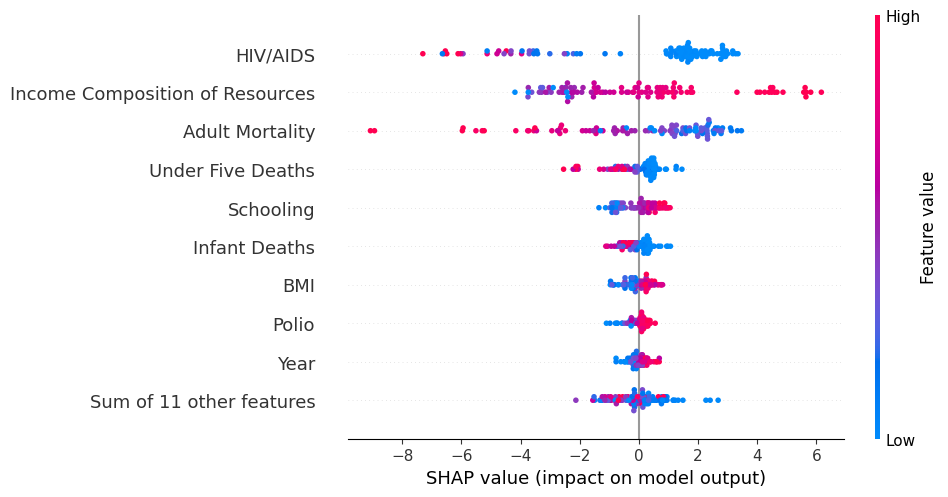

In [ ]:
# Get a sample of the training data for speed
X_sample = X_test2.sample(n = 100, random_state = 1)

# SHAP explainer
explainer = shap.Explainer(lgb_reg.predict, X_sample)

# SHAP values
shap_values = explainer(X_sample)

# Plot summary
shap.plots.beeswarm(shap_values)

### Insights from SHAP Findings (LightGBM, 100 Samples)

1. HIV/AIDS has the strongest negative impact on life expectancy. High values sharply reduce predictions, making it the most harmful feature.

2. Income Composition of Resources is the most influential positive feature. Higher income composition strongly increases life expectancy, highlighting the importance of socioeconomic development.

3. Adult Mortality, Under Five Deaths, and Infant Deaths are major negative predictors. High values in these features significantly reduce life expectancy, reflecting the role of mortality at different ages.

4. Schooling positively affects life expectancy. More years of education contribute to higher predicted values, possibly with better chance of having more lucrative occupations that leads to better health benefits.

5. BMI shows a mixed pattern. Both high and low values can have positive or negative effects, indicating a nonlinear relationship.

6. Polio and Year have smaller but consistent positive effects.

7. The remaining 11 features have minimal individual impact.

## Conclusion and Insights:

**Primary Health Determinants:**

* HIV/AIDS prevalence emerged as the strongest negative predictor, highlighting the critical need for prevention and treatment programs.

* Income composition and schooling showed the highest positive impact, reinforcing the importance of socioeconomic development.

* Adult and infant mortality rates serve as key indicators of healthcare system effectiveness.

**Global Health Disparities**

* Statistical significance (p < 0.05) confirmed substantial differences between country development status.

* t-SNE clustering revealed clear separation between developed and developing nations' health patterns.

**Policy Implications**

* Immediate Impact: Prioritize HIV/AIDS treatment programs and vaccination coverage (Polio, Diphtheria)

* Long-term Investment: Expand education systems and reduce income inequality

* Healthcare Infrastructure: Focus on reducing adult mortality and improving maternal/child health

* Resource Allocation: Target interventions based on country development status